<a href="https://colab.research.google.com/github/jatinkanyan/End-to-End-machine-learning-project/blob/main/data_science_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Bike Sharing Demand Prediction

Project Type - Exploatory data Analysis / Regression

Contribution - individual
Projected By - Jatin Kanyan

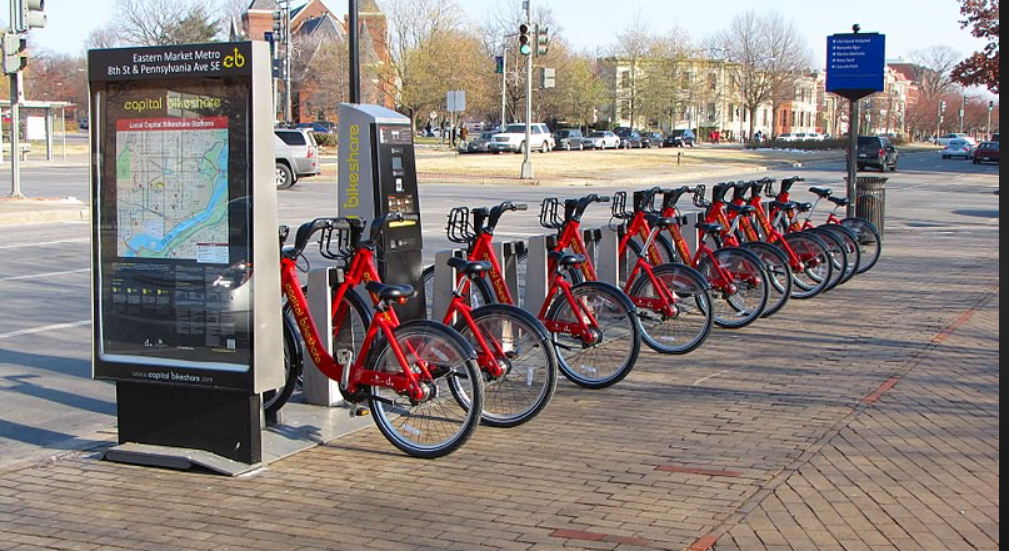


# **Project Summary**

The project is dedicated to improving public mobility and convenience through the implementation of bike-sharing programs in metropolitan areas. With the aim of ensuring a consistent supply of bikes for rental, I tackle the challenge of predicting demand based on historical data. By leveraging factors such as temperature and time, I employ advanced machine learning techniques to forecast the bike-sharing program's usage in Seoul.

With a dataset containing approximately 8760 records and 14 attributes, I embarked on an extensive data analysis journey. Through exploratory data analysis (EDA), we gained valuable insights and prepared the data for modeling. Cleaning processes were applied to eliminate outliers and handle null values, while appropriate transformations were employed to ensure compatibility with machine learning algorithms.

Subsequently, the cleaned and scaled data was fed into 11 diverse models, allowing me to evaluate their performance using multiple metrics. Hyperparameter tuning was conducted to optimize the models and ensure accurate predictions.

In my evaluation, I prioritize metrics such as the R2 score and RMSE score. The R2 score, being scale-independent, enables us to compare models with different target variables or units of measurement. This provides a robust framework for assessing model performance across various problem domains.

By accurately forecasting bike-sharing demand, I aim to enhance resource allocation, reduce wait times, and elevate the overall user experience.



# **Github Link -**

# **Problem Statement**



**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# Lets Get Started

1 Know your data

# Importing Libraries

In [44]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

# Read the dataset

In [45]:
bike_data = pd.read_csv('/content/Renatal Bike Sharing.csv',encoding='unicode_escape')

In [46]:
bike_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

# Counting Rows and columns

In [47]:
# Dataset Rows & Columns count
print(f"No. of rows-", bike_data.shape[0])
print(f"No. of columns-", bike_data.shape[1])

No. of rows- 8760
No. of columns- 14


In [48]:
# Dataset info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Observation**

**Float64 datatype:** 6 columns ie Temperature(°C), Wind speed (m/s, Dew point temperature(°C), Solar Radiation(MJ/m2), Rainfall(mm), Snowfall(cm) & Seasons.

**Int64 datatype:** 4 columns ie Rented Bike, Count, Hour, Humidity(%) & Visibility(10m).

**Object datatype:** 4 columns ie Date, Seasons, Holidays & Functioming Day.

# Duplicated Value

In [49]:
bike_data.duplicated().sum()

0

there are no duplicated values

In [50]:
#Checking Unique Values
bike_data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

This data is for ine year as date has 365 distinct values

In [51]:
# Missing values/Null Values Count
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No missing value is found


<Axes: >

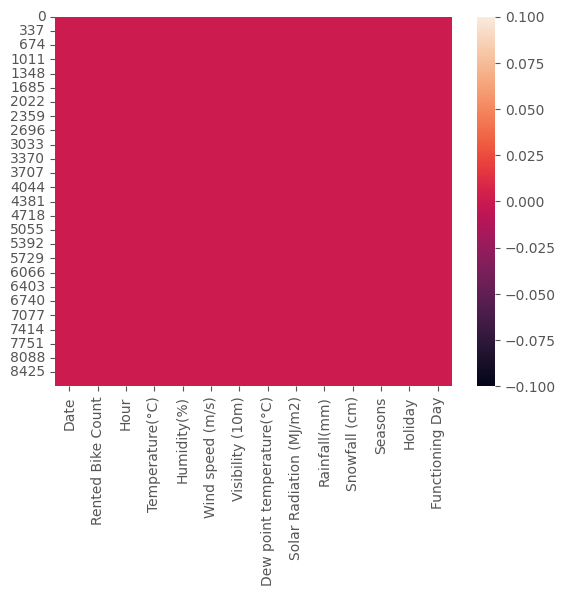

In [52]:
# Visualizing the missing values/
sns.heatmap(bike_data.isnull())


From the above dataset it is clearly visible that the dataset doesnt have any missing value

# information about the dataset

The dataset contains 8760 rows and 14 columns.


---


There are 6 columns of datatype float64, 4 columns of datatype int64 and 4 columns of datatype object.


---


There are no missing and duplicate values in the dataset.
The dataset contains bike rental data of 1 year.


---


Input features: Date, Hour, Temperature(°C), Humidity(%), Wind speed (m/s),Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Season, Holiday & Functioning Day

---



Target feature: Rented Bike Count

#2. Understanding your variable

In [53]:
# Dataset columns
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [54]:
bike_data.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

**Observations:**

Rainfall: 75% of the datapoints recorded were of below 0 cm ie no rainfall. Only 25% records was above 0.

Snowfall: 75% of the datapoints were recorded were of 0 ie No Snowfall. Only 25% was above 0.

# Variable Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information:**

**Date:** The specific calendar date for the bike rental record.

**Rented Bike Count:**  The number of bikes rented during a specific time interval.

**Temperature:** The temperature in Celsius at the time of the bike rental.

**Humidity:** The relative humidity percentage at the time of the bike rental.

**Wind Speed:** The speed of the wind in meters per second at the time of the bike rental.

**Visibility:** The visibility in meters at the time of the bike rental.

**Dew Point Temperature:** The temperature at which air becomes saturated and dew forms at the time of the bike rental.

**Solar Radiation:** The amount of solar radiation in mega-joules per square meter at the time of the bike rental.

**Rainfall:** The amount of rainfall in millimeters at the time of the bike rental.

**Snowfall:** The amount of snowfall in centimeters at the time of the bike rental.

**Seasons:** The four seasons (Spring, Summer, Autumn, Winter) corresponding to the bike rental record.

**Holiday:** A categorical variable indicating whether the day of the bike rental record is a holiday or not. It has two possible values: "Holiday" and "No Holiday". The "Holiday" value represents a day that is recognized as a holiday, while the "No Holiday" value represents a regular day that is not a designated holiday.

**Functioning Day:** A categorical variable indicating whether the bike rental service was functioning on the day of the record. It has two possible values: "Yes" and "No". The "Yes" value indicates that the bike rental service was operational and functioning normally on that day. Conversely, the "No" value indicates that the bike rental service was not operating, potentially due to maintenance, strikes, or other reasons.

# Checking unique Values for each variable

In [55]:
# Check Unique Values for each variable.
for col in bike_data.columns:
  print(f"{col} has {bike_data[col].nunique()} unique values.")
  print('----------------------------------------------------')

Date has 365 unique values.
----------------------------------------------------
Rented Bike Count has 2166 unique values.
----------------------------------------------------
Hour has 24 unique values.
----------------------------------------------------
Temperature(°C) has 546 unique values.
----------------------------------------------------
Humidity(%) has 90 unique values.
----------------------------------------------------
Wind speed (m/s) has 65 unique values.
----------------------------------------------------
Visibility (10m) has 1789 unique values.
----------------------------------------------------
Dew point temperature(°C) has 556 unique values.
----------------------------------------------------
Solar Radiation (MJ/m2) has 345 unique values.
----------------------------------------------------
Rainfall(mm) has 61 unique values.
----------------------------------------------------
Snowfall (cm) has 51 unique values.
----------------------------------------------------


#3. Data Wrangling

In [56]:
# Converting Date column of datatype Object to Datetime datatype
bike_data['Date'] = pd.to_datetime(bike_data['Date'], dayfirst = True)

In [57]:
# Extracting day name feature
bike_data['Day'] = bike_data['Date'].dt.day_name()

# Extracting month name feature
bike_data['Month'] = bike_data['Date'].dt.month_name()

# Extracting year feature
bike_data['Year'] = bike_data['Date'].dt.year

In [58]:
# Dropping Date column
bike_data.drop(columns = ['Date'], inplace = True)

In [59]:
#Rename the complex columns name
bike_sharing_df = bike_data.rename(columns={
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind Speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew point temperature',
                                'Solar Radiation (MJ/m2)':'Solar Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                              },inplace=True)

In [60]:
# convert Hour and Year columns from integer to object
bike_data['Hour'] = bike_data['Hour'].astype('object')
bike_data['Year'] = bike_data['Year'].astype('object')

In [61]:
# Dataset view after cleaning
bike_data.head()

Rented Bike Count Hour  Temperature  Humidity  Wind Speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning Day     Day     Month  Year  
0  No Holiday             Yes  Friday  December  2017  
1  No Holiday             Yes  Friday  December  2017  
2  No Holiday             Yes  Friday  December  2017  
3  No Holiday             Yes  Friday  December  2017  
4  No Holiday             Yes  Friday  December  2017

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**What is EDA?**

EDA stands for Exploratory Data Analysis. It is a crucial step in the data analysis process that involves exploring and understanding the characteristics, patterns, and relationships within a dataset. EDA aims to uncover insights, identify patterns, detect outliers, and gain a deeper understanding of the data before conducting further analysis or modeling.

In [62]:
# Dividing data into numerical and categorical features

categorical_features = bike_data.select_dtypes(include = 'object')
numerical_features = bike_data.select_dtypes(exclude = 'object')

# **Univariate Analysis**

Distrubution of numeric columns

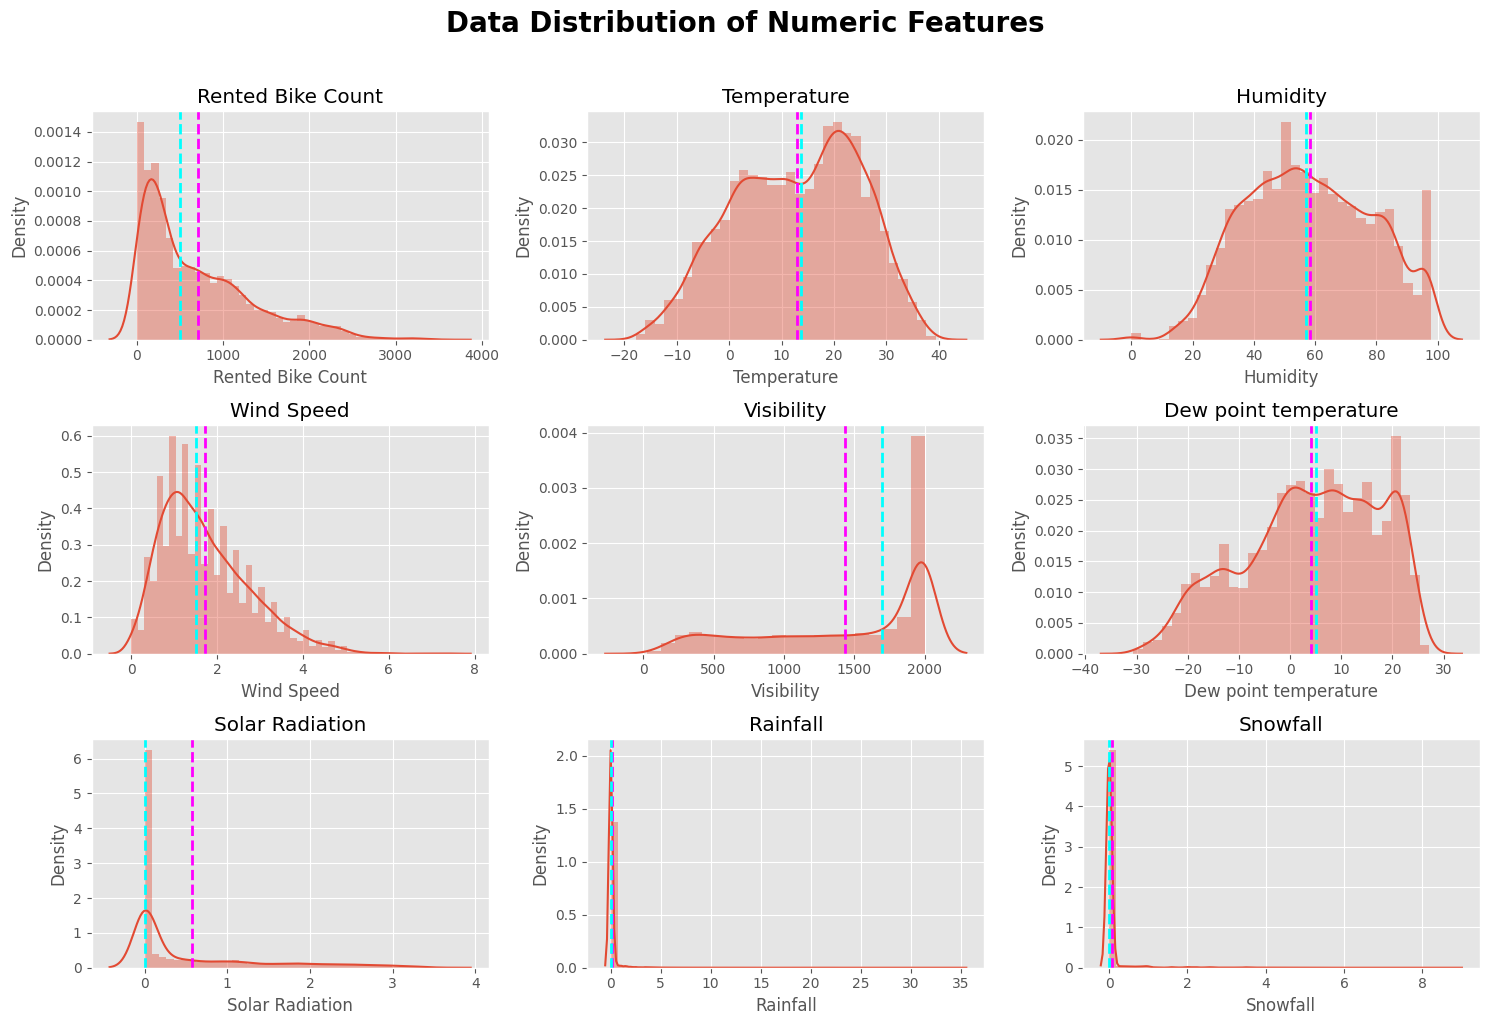

In [63]:
# figsize
plt.figure(figsize=(15,10))

# title
plt.suptitle('Data Distribution of Numeric Features', fontsize = 20, fontweight = 'bold', y=1.02)

for i, col in enumerate(numerical_features):
  # subplots 3 rows and 3 columns
  plt.subplot(3, 3, i+1 )

  # dist plot
  sns.distplot(bike_data[col])
  plt.axvline(bike_data[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_data[col].median(), color='cyan', linestyle='dashed', linewidth=2)

  plt.title(col)
  plt.tight_layout()

**Observations:**

For numerical features, we can see that the majority of distributions are right-skewed and few are left-skewed and tempareture and humidity is closed to normal distribution.

**Right-skewed columns:** Rented Bike Count, Wind speed, Solar Radiation, Rainfall & Snowfall.

**Left-skewed columns:** Visibility & Dew point temperature

Outlier detection of numeric columns:


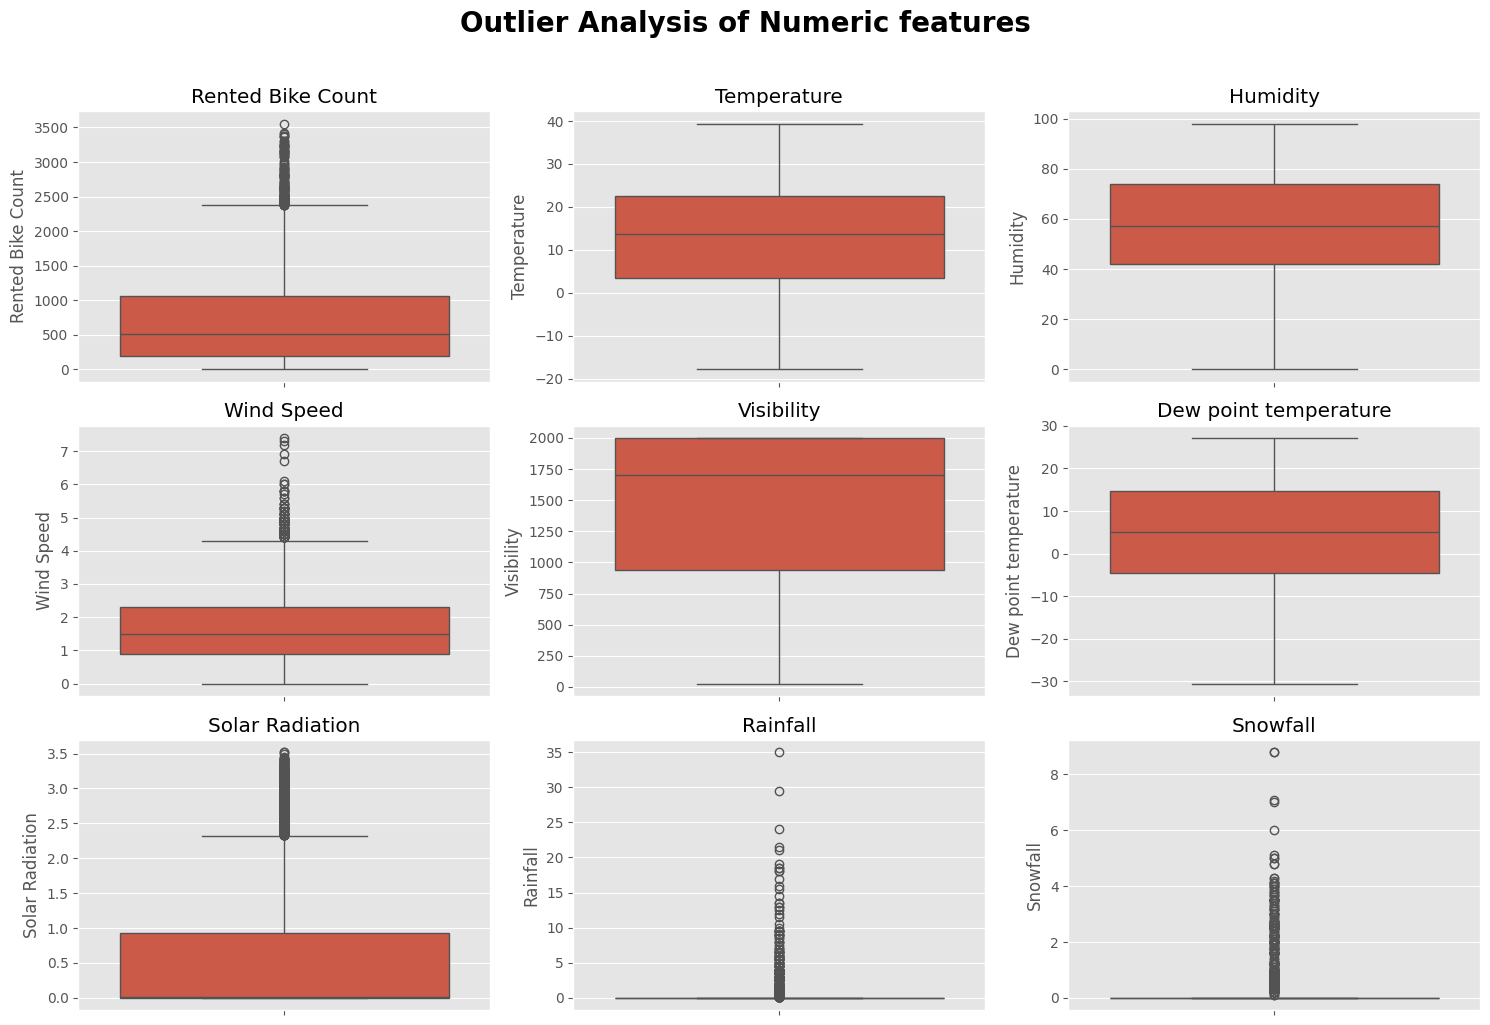

In [64]:
# figsize
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outlier Analysis of Numeric features', fontsize = 20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(3,3, i+1)

  # boxplots
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()

**Observations:**

Outliers are visible in most of the numerical columns.

These columns are Rented Bike Count, Wind Speed, Solar Radiation, Rainfall & Snowfall.

The columns like Temperature, Humidity, Visibility & Dew point temperature do not contain any outliers.

**Univariate analysis of categorical variable:**

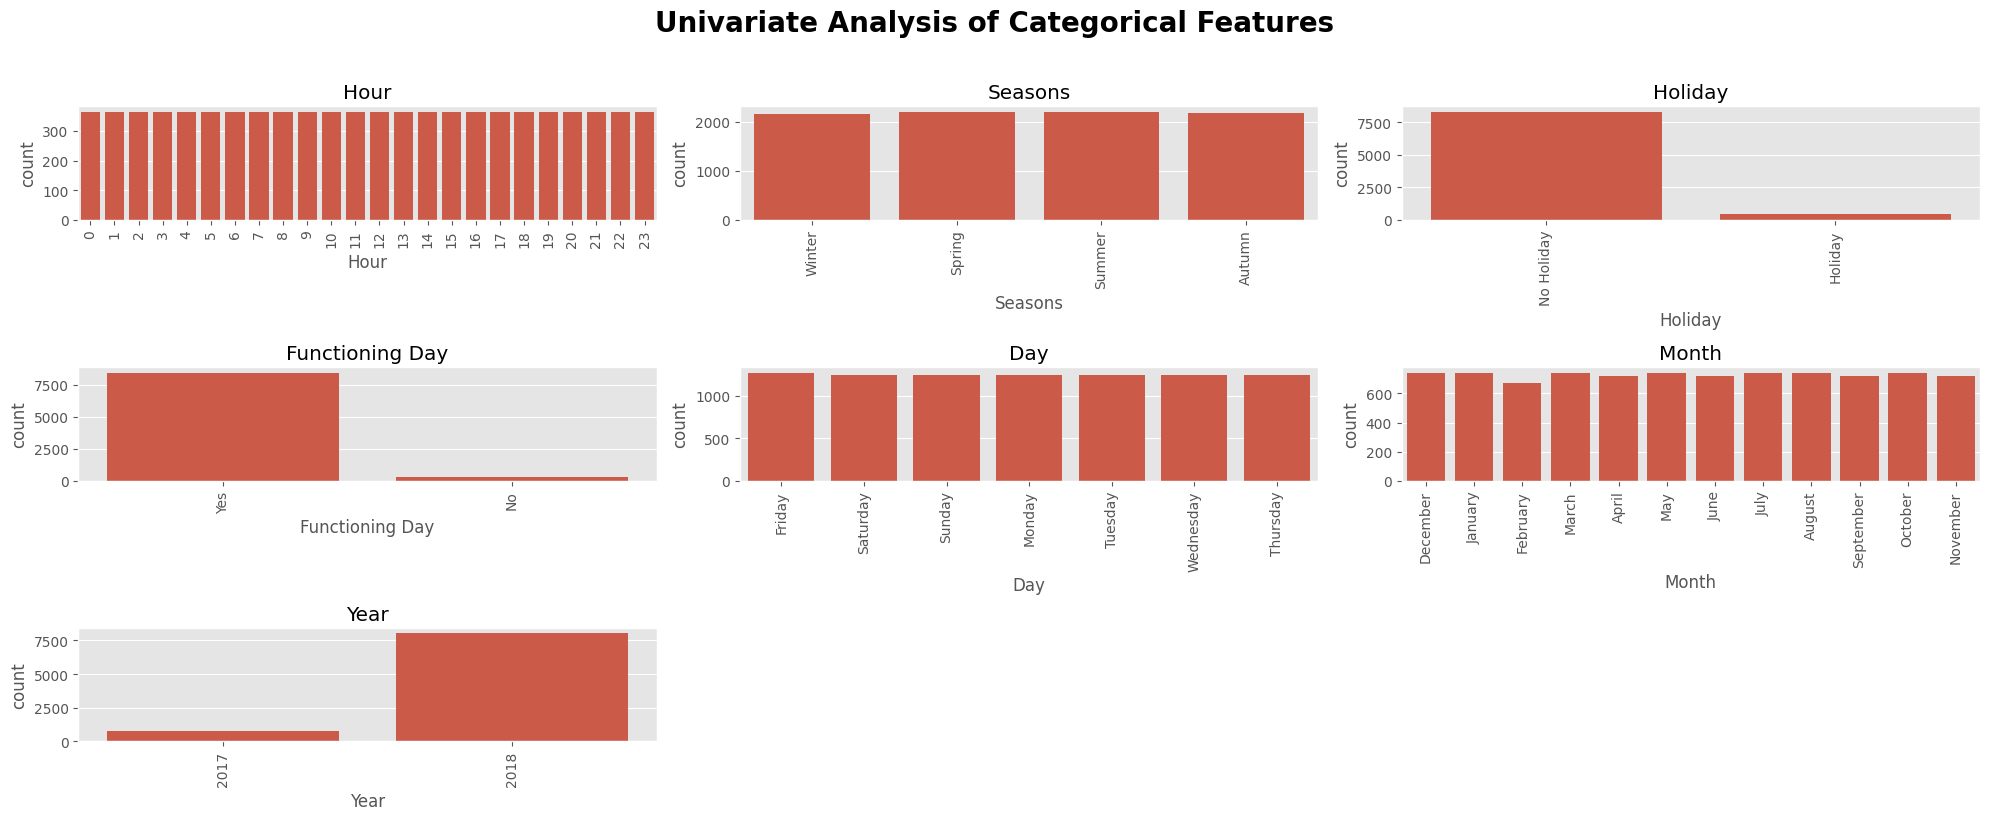

In [65]:
# figure
plt.figure(figsize = (20,8))

# title
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20, fontweight = 'bold', y = 1.02)

for i, col in enumerate(categorical_features):
  # subplots of
  plt.subplot(3,3, i+1)

  # Countplots
  sns.countplot(x = categorical_features[col])

  plt.xticks(rotation ='vertical')
  plt.title(col)
  plt.tight_layout()

**Observations:**

Every hour has an equal number of counts in the dataset.

Every season has almost equal number of counts.

Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.

Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.

Except Friday, other Days have equal number of counts in the dataset.

Months like April, June, September, November & February have a slightly low number of count comparted to other months.

More data was colected in the year 2018 than 2017.

# Bivariate and Multivariate analysis

Analysisng target and the numerical variable

<Figure size 640x480 with 0 Axes>

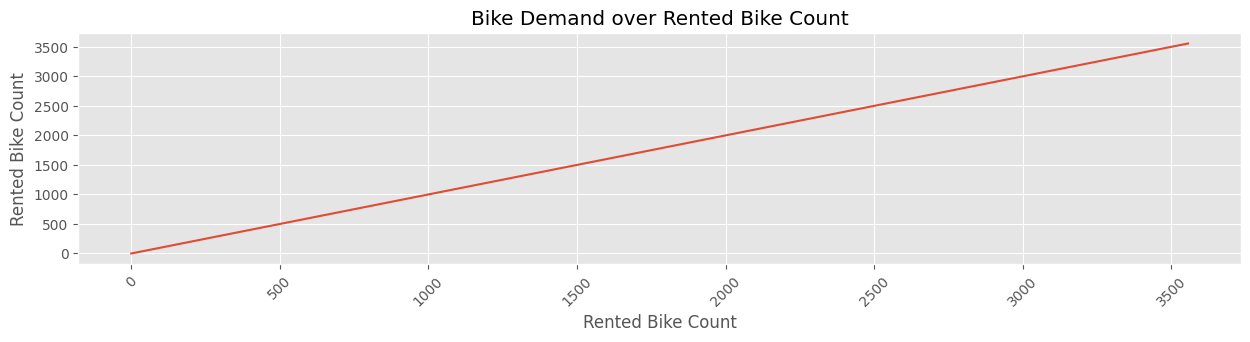

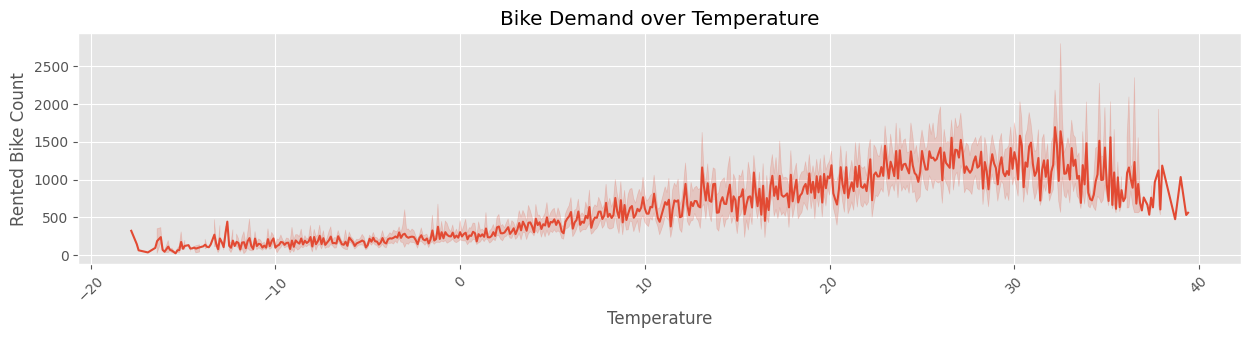

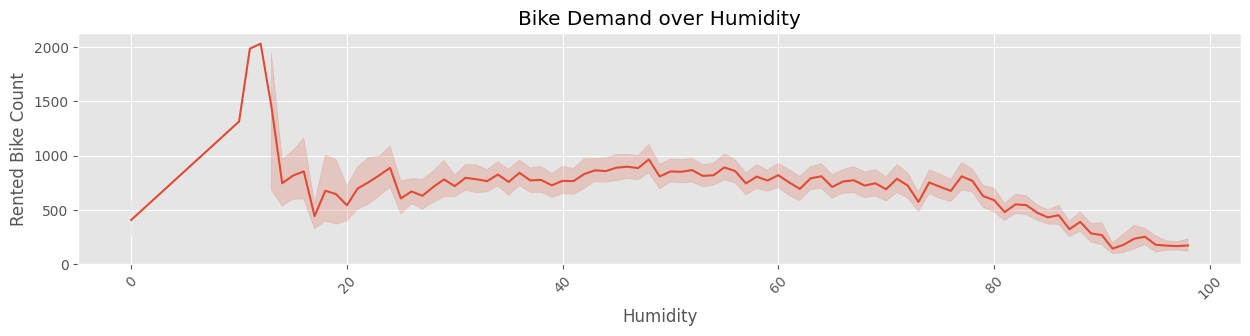

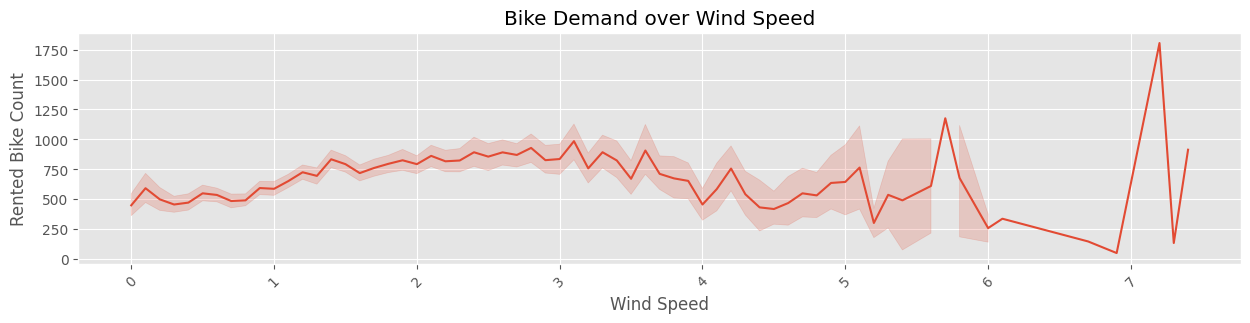

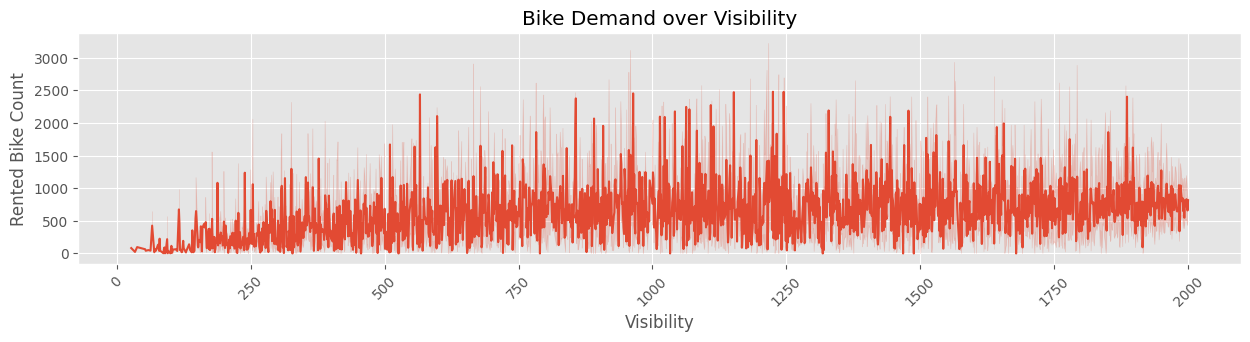

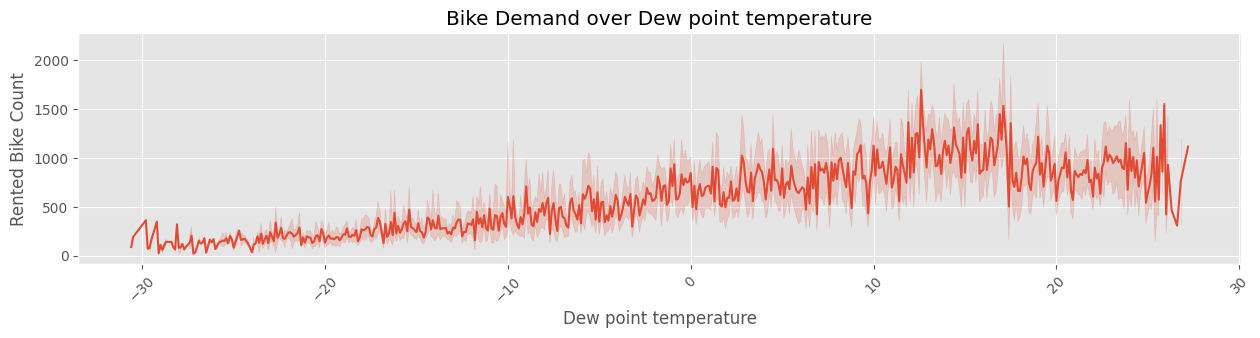

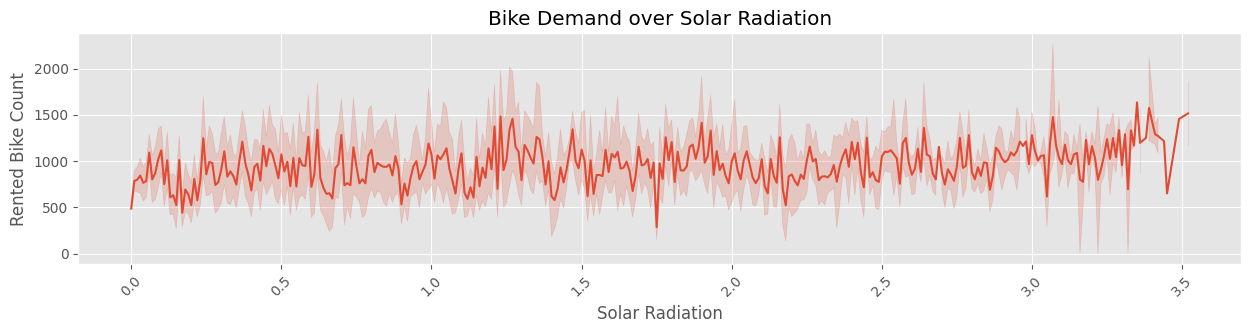

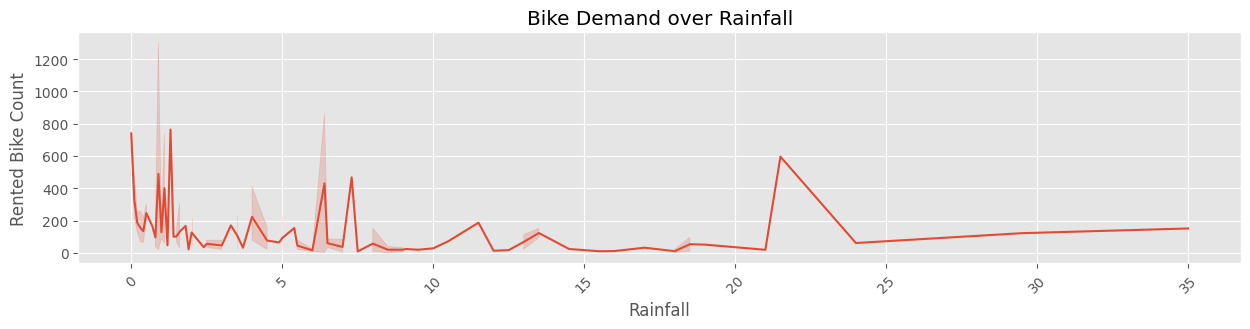

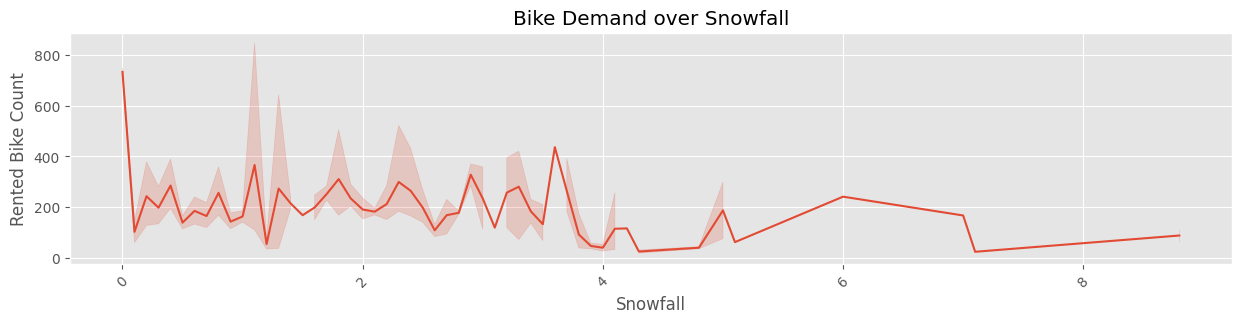

In [66]:
# Identify patterns and trends in numerical features

plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)


for i in numerical_features:
  plt.figure(figsize=(15,3))
  sns.lineplot(x= i, y='Rented Bike Count', data = numerical_features, palette='Grouped')
  plt.title(f"Bike Demand over {i}");
  print('\n')
  plt.xticks(rotation = 45)

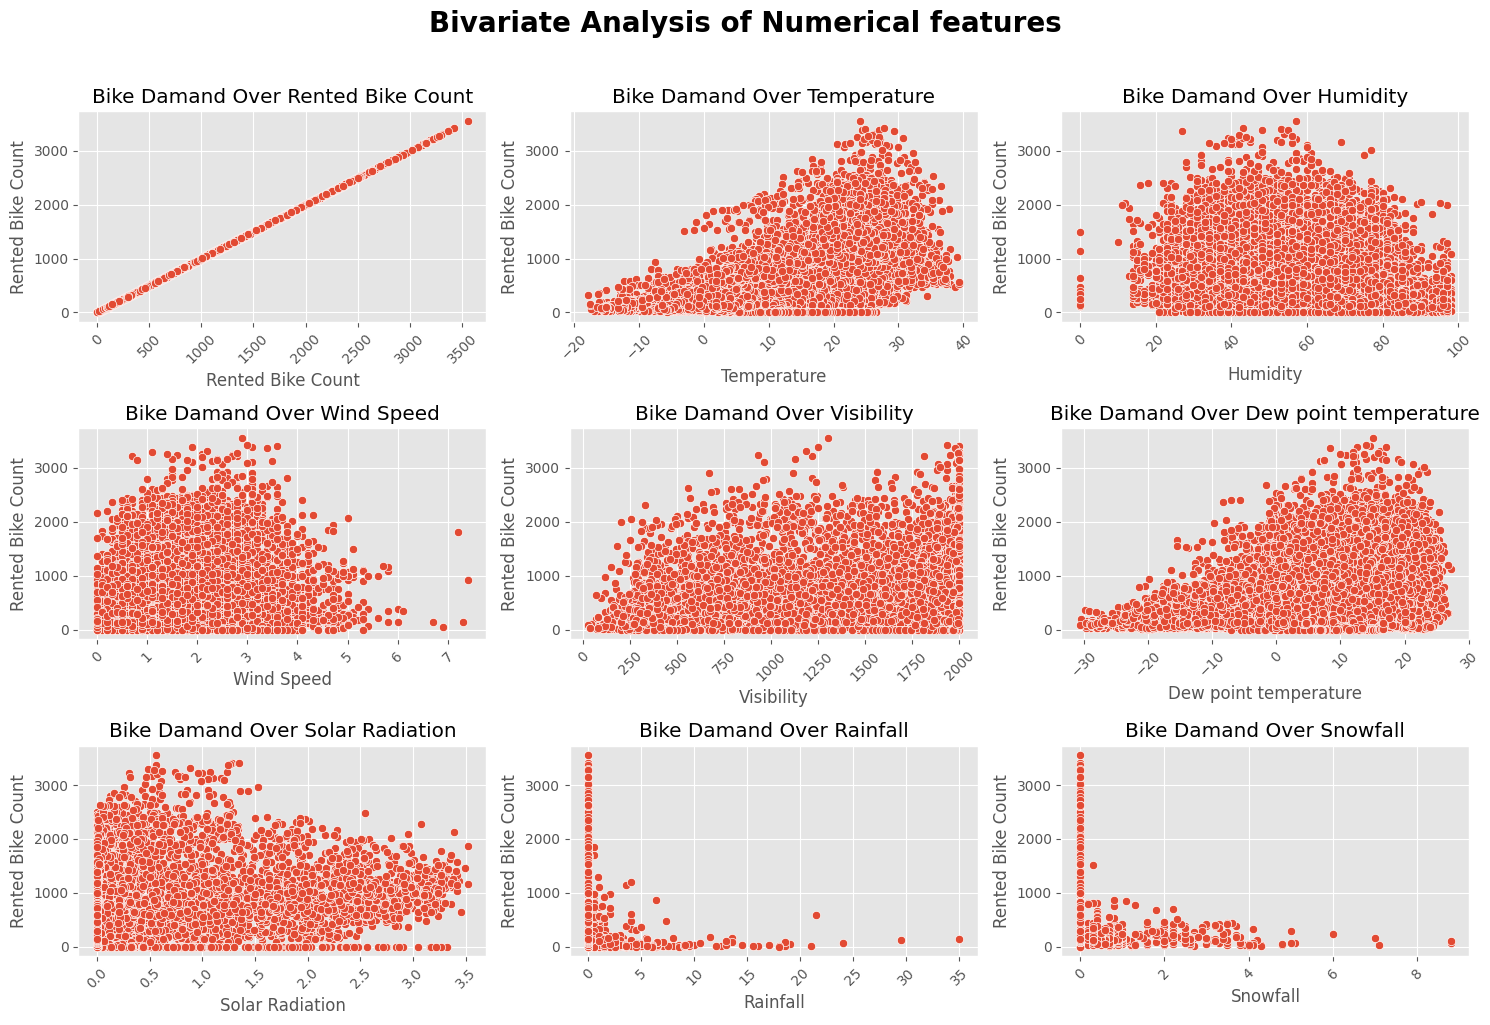

In [67]:
plt.figure(figsize = (15, 10))

# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for index, col in enumerate(numerical_features):

  # subplots of 3 rows and 3 columns
  plt.subplot(3,3, index+1)

  # line plots
  sns.scatterplot(x = numerical_features[col], y = numerical_features['Rented Bike Count'])

  plt.title(f'Bike Damand Over {col}')
  plt.xticks(rotation = 45)
  plt.tight_layout()

# Bivariate Analysis on categorical variable:

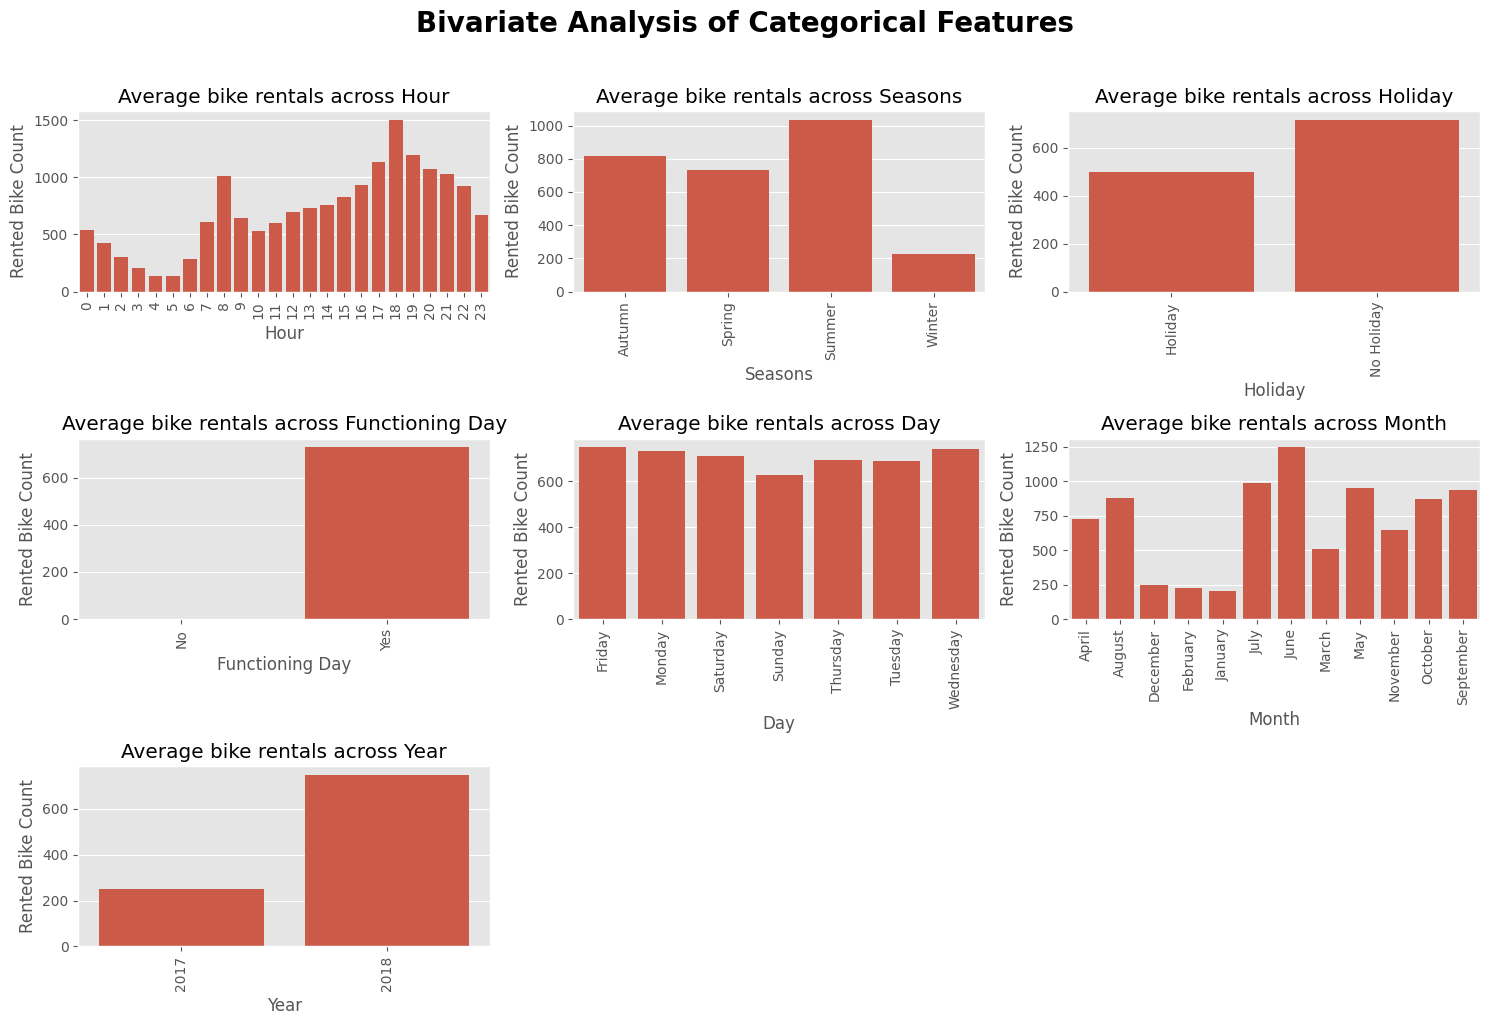

In [68]:
# Counting number of category present in each feature with respect to target feature

# figsize
plt.figure(figsize=(15,10))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features):
   # subplots of 3 rows and 3 columns
  plt.subplot(3, 3, i+1)
  a = bike_data.groupby(col)[['Rented Bike Count']].mean().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['Rented Bike Count'])
  # x-axis label
  plt.title(f'Average bike rentals across {col}')
  plt.xticks(rotation = 'vertical')
  plt.tight_layout()

**Observations:**

**Hours:** The highest demand is in hours from say 7-10 and from 15-19. This
could be the reason that in most of the metroploitan cities this is the peak office time so more people would be renting bikes.

**Seasons:** Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.

**Holidays:** High number of bikes were rented when there is No Holidays.

**Functioning Day**: On 'No Functioning Day, only 295 bikes were rented. Hence, this column does not add value to our prediction, we can drop this column in the next steps.

**Day:** Most of the bikes were rented on Weekdays compared to weekends.

**Month:** From March Bike Rent Count started increasing and it was highest in June.

# **Multivariate Analysis**

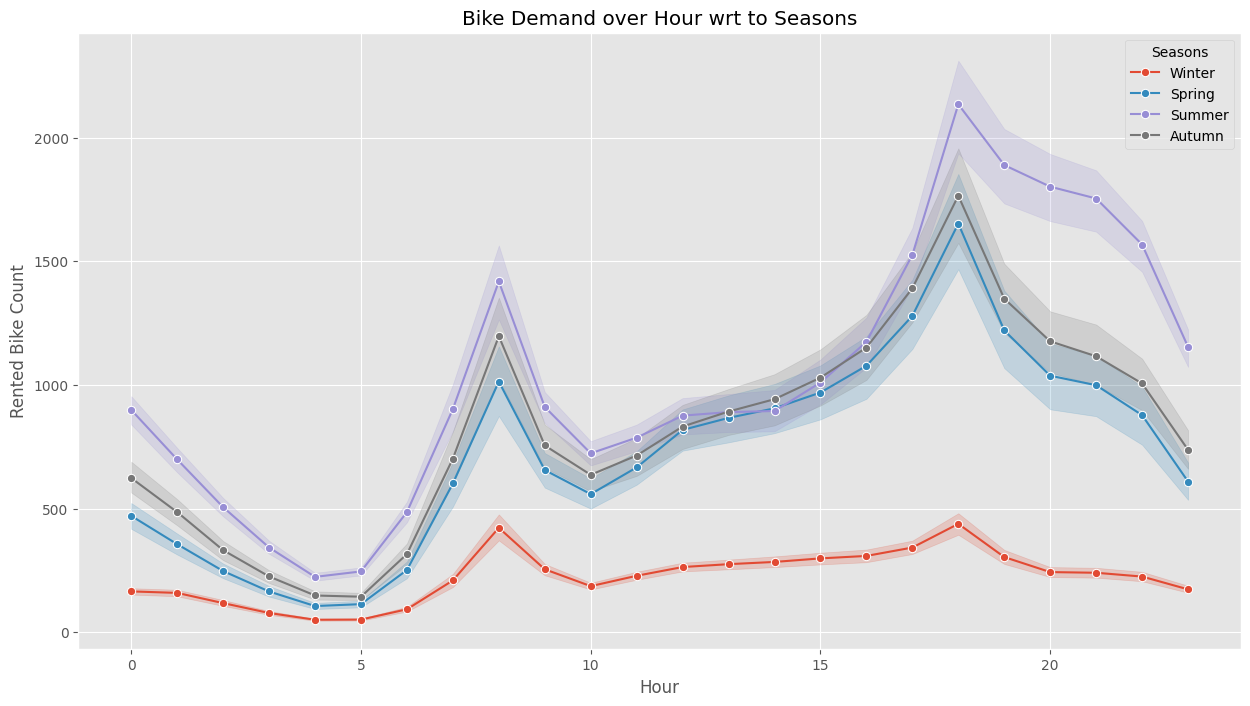

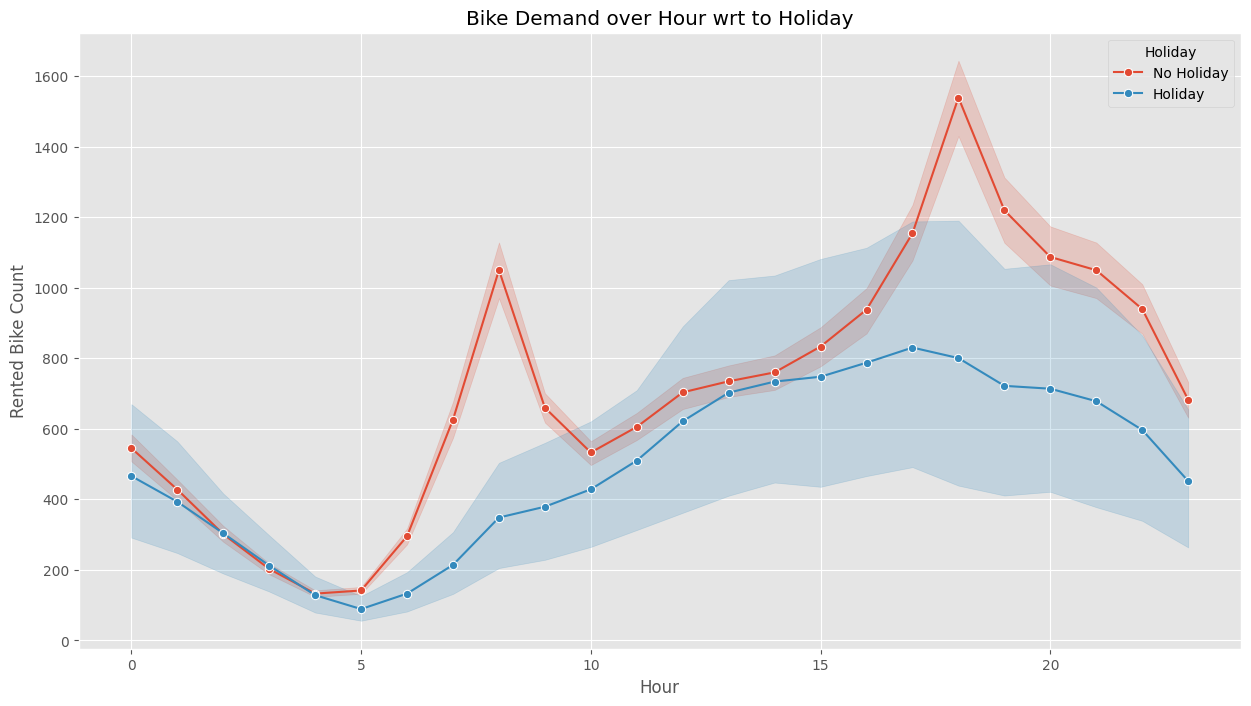

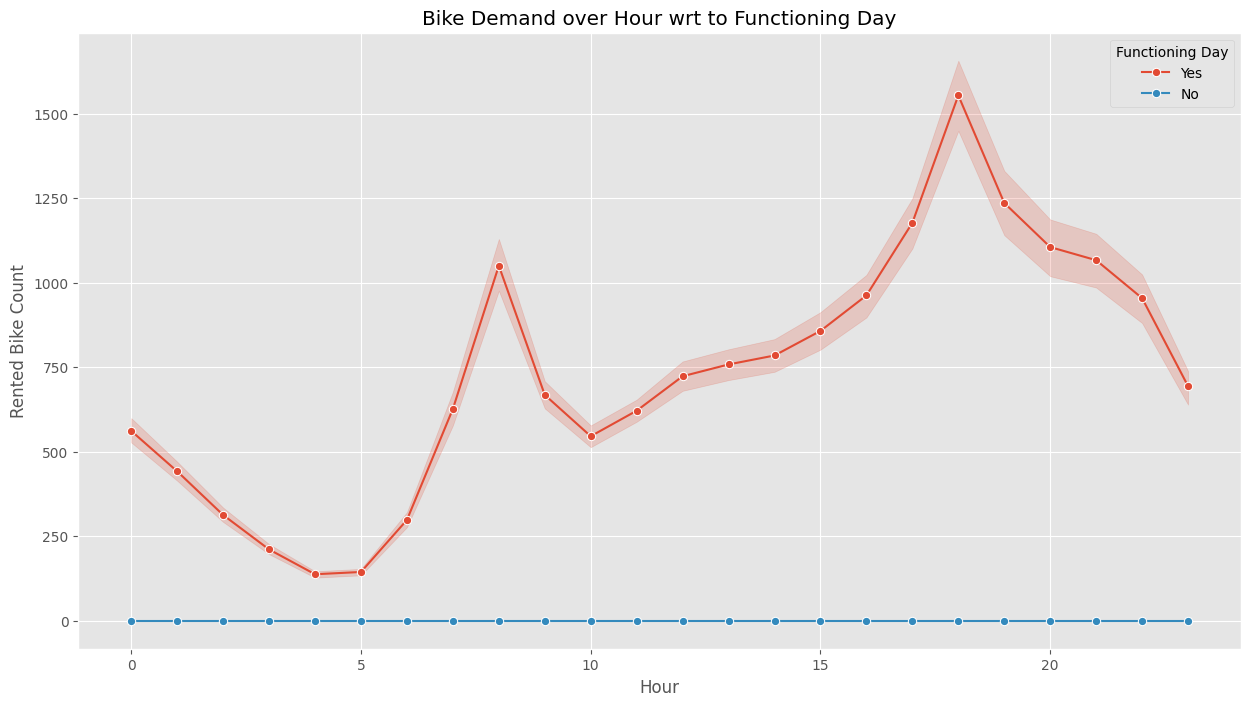

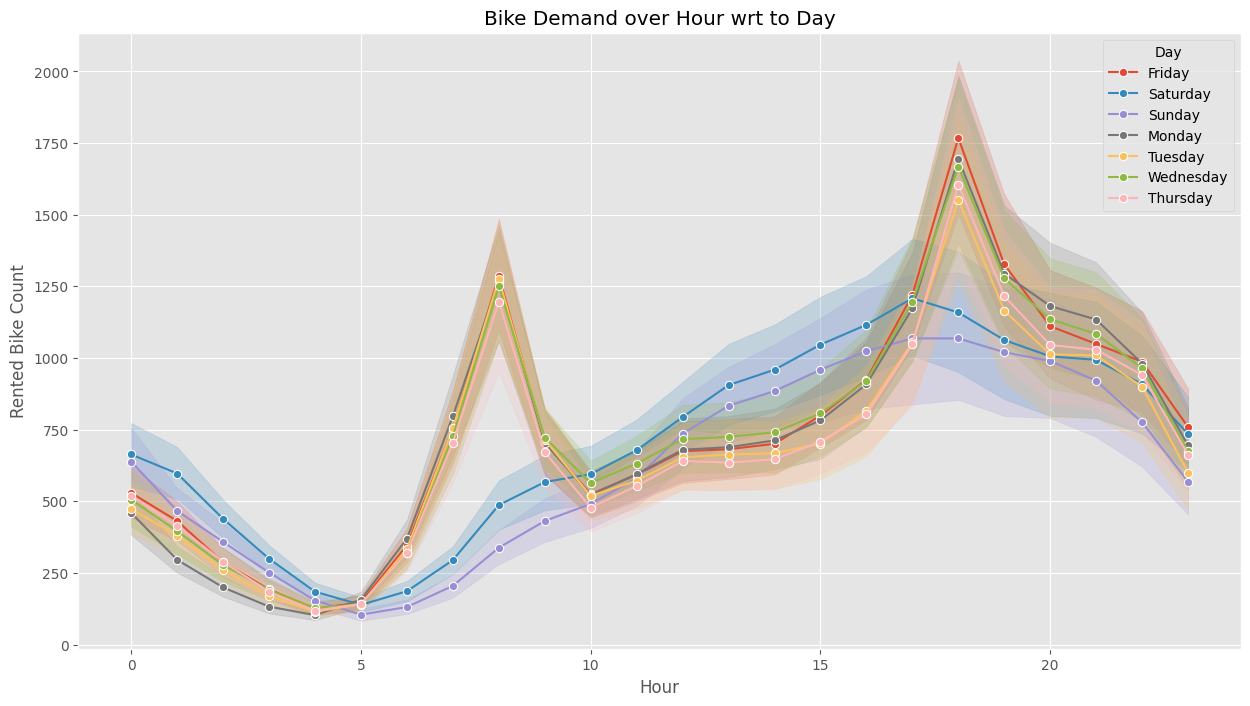

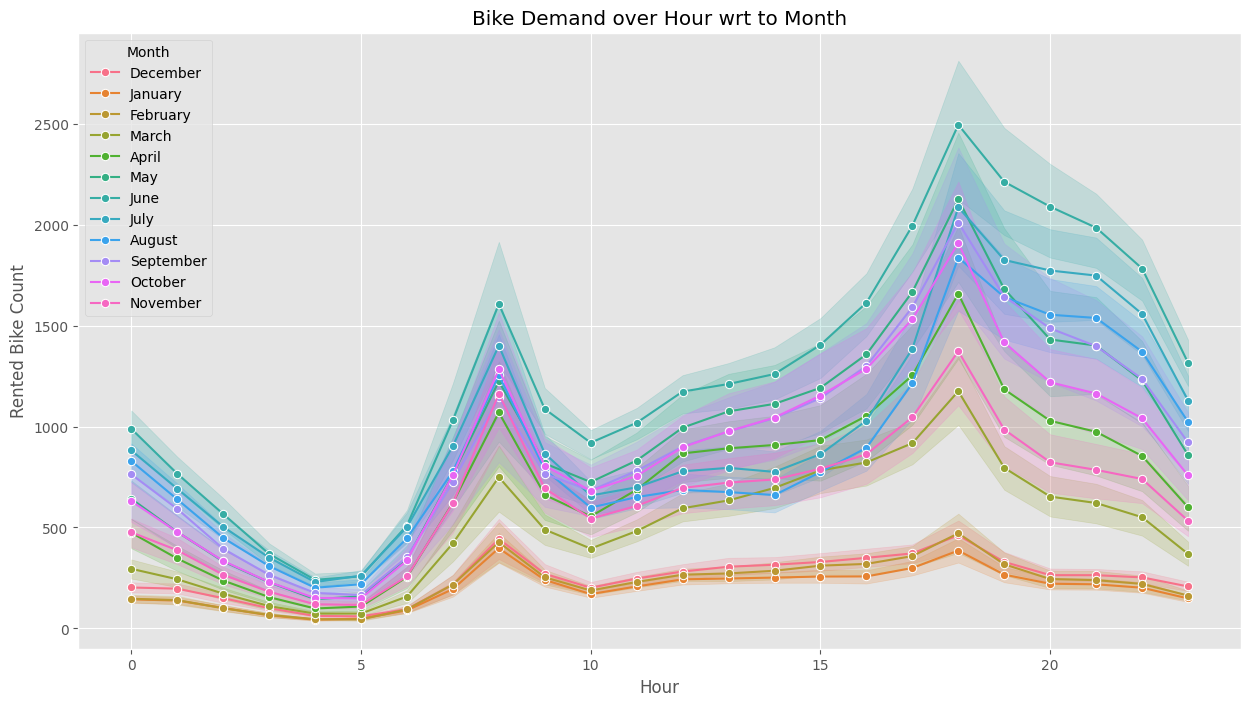

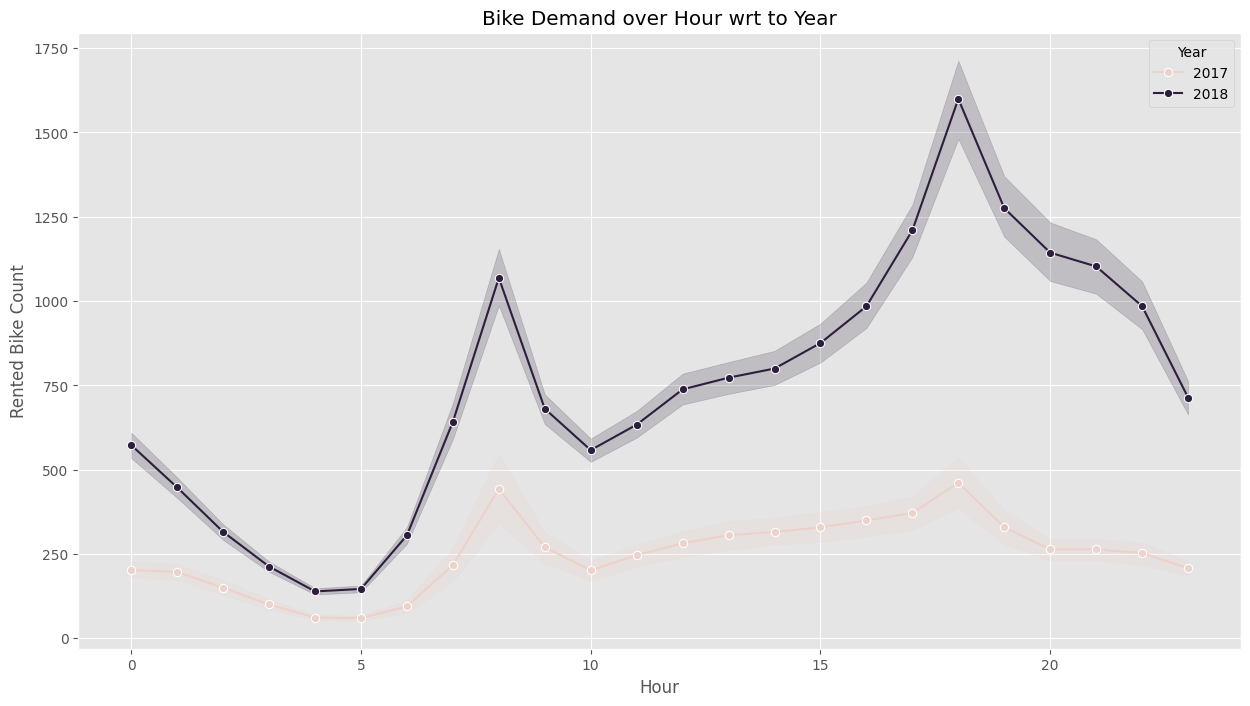

In [69]:
# Analysing bike demand with respect to hour and different third value

for i in categorical_features:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,8))
    sns.lineplot(x= bike_data["Hour"], y= bike_data['Rented Bike Count'], hue= bike_data[i], marker ='o')
    plt.title(f"Bike Demand over Hour wrt to {i}")
  plt.show()

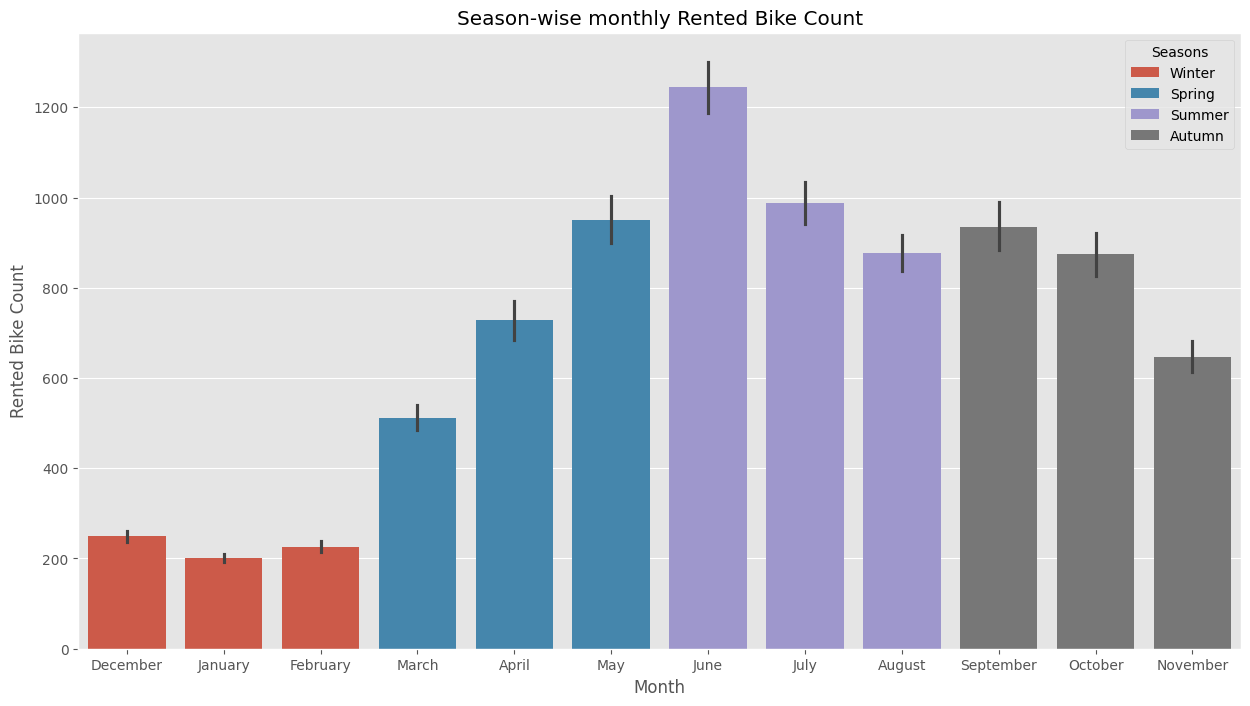

In [70]:
#Bar plot for seasonwise monthly distribution of Rented_Bike_Count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='Rented Bike Count',data= bike_data, hue='Seasons',ax=ax)
ax.set_title('Season-wise monthly Rented Bike Count')
plt.show()

**Observations:**

The above regression plots for the numerical features indicate that the columns Temperature, Wind_speed, Visibility, Dew_point_temperature & Solar_Radiation are positively correlated with the target variable, ie , with an increase in these features results in an increase in rented bike count.


On the other hand, Rainfall, Snowfall & Humidity are negatively correlated with the target variable, indicating that with an increase in these features results in a decrease in rented bike count.

#6.0 Feature Engineering and Data Pre-processing



1.0 Handling missing values

In [71]:
# Handling Missing Values & Missing Value Imputation
bike_data.isnull().sum()

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Day                      0
Month                    0
Year                     0
dtype: int64

There are no missing values in the dataset.

2.0 Handling Outliers

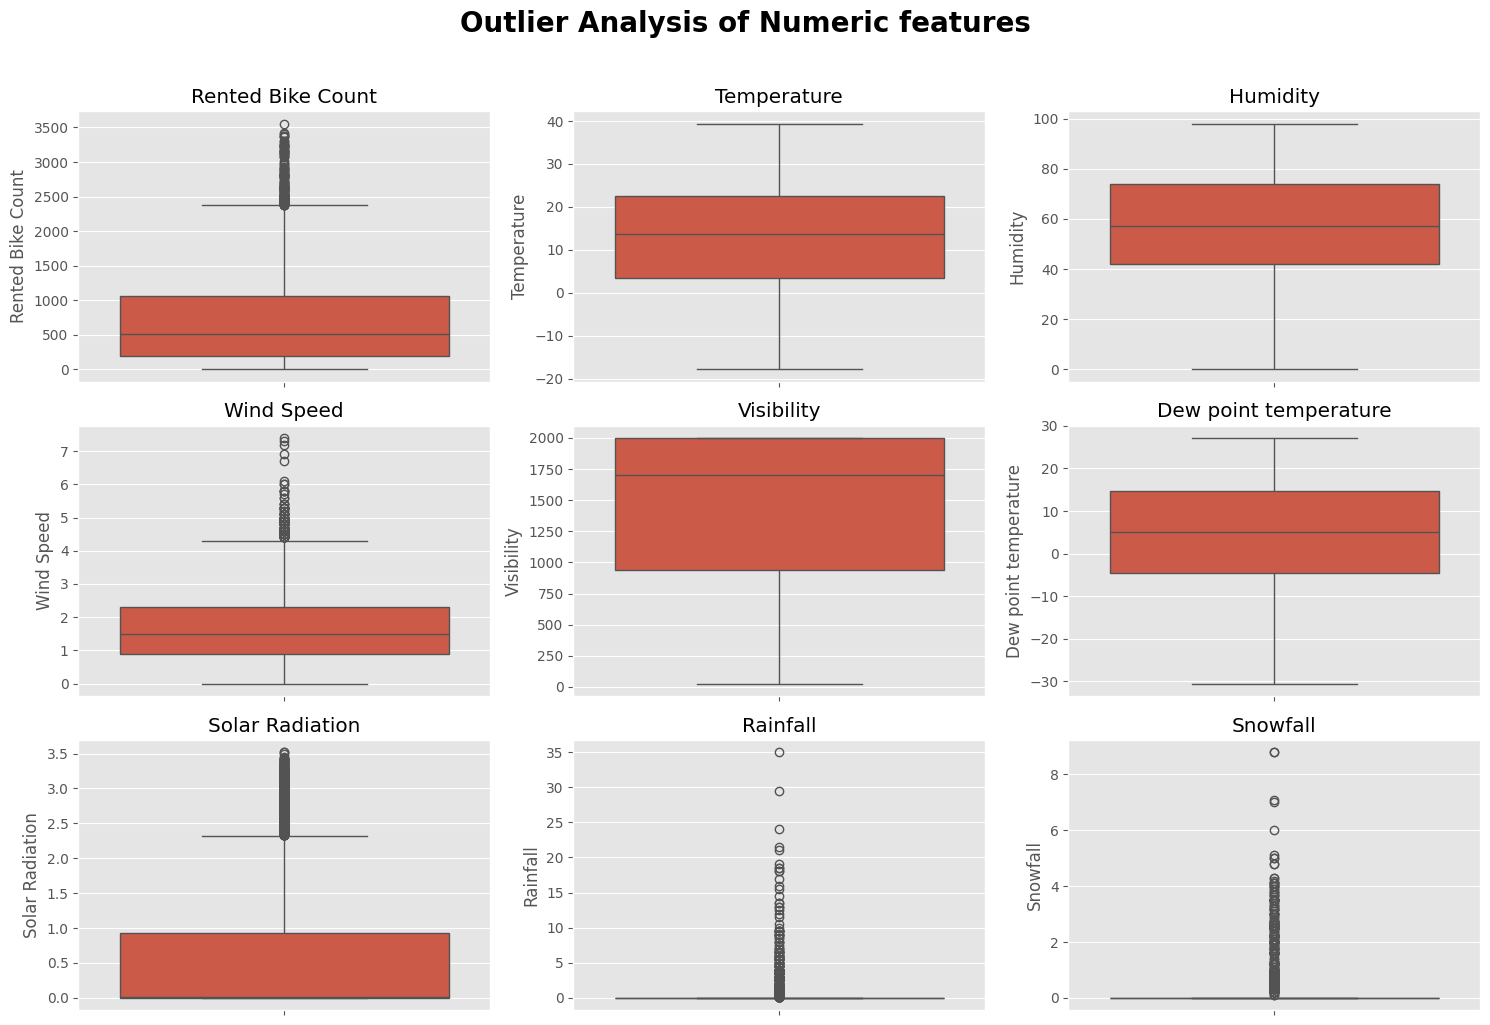

In [72]:
# Handling Outliers & Outlier treatments
#Creating a boxplot to detect columns with outliers
# figsize
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outlier Analysis of Numeric features', fontsize = 20, fontweight='bold', y=1.02)

for index , col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(3,3, index+1)

  # boxplots
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()



Here we can see that the columns that contain outliers are Rented Bike Count, Windspeed, Solar Radiation, Rainfall&Snowfall.

In [73]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rented Bike Count', 'Wind Speed', 'Solar Radiation', 'Rainfall','Snowfall']
outlier_cols

['Rented Bike Count', 'Wind Speed', 'Solar Radiation', 'Rainfall', 'Snowfall']

In [74]:
def calculate_ranges(data, column):

  # Skip categorical columns
  if data[column].dtype == 'object':
    return None, None
  else:
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate upper and lower ranges
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR

    return upper_range, lower_range

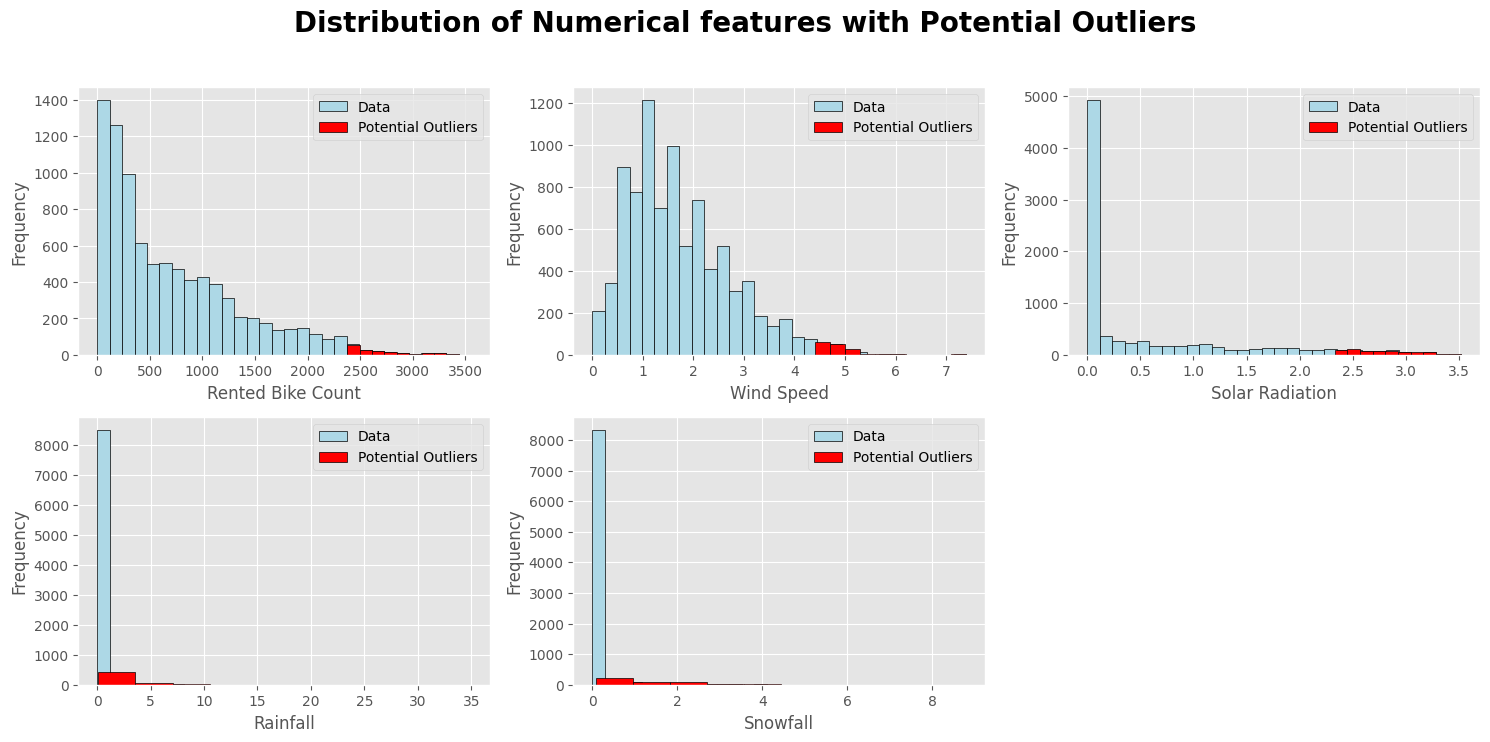

In [75]:
# Identify potential outliers
plt.figure(figsize = (15,10))

for index, col in enumerate(outlier_cols):

  # Apply calculate_ranges function to get upper bound and lower bound
  upper_bound, lower_bound = calculate_ranges(bike_data, col)

  # Identify potential outliers
  outliers = bike_data[(bike_data[col] > upper_bound) | (bike_data[col] < lower_bound)]

# Visualize the potential outliers
  #plt.figure(figsize=(8, 6))

  # subplots 3 rows, 3 columns
  plt.subplot(3,3, index+1)
  plt.hist(bike_data[col], bins=30, color='lightblue', edgecolor='black', label='Data')
  plt.hist(outliers[col], bins=10, color='red', edgecolor='black', label='Potential Outliers')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.suptitle('Distribution of Numerical features with Potential Outliers', fontsize = 20, fontweight='bold', y=1.02)
  plt.legend()
  plt.tight_layout()
  #plt.show()


In [76]:
# Create a function to count the total number of outliers in each column

def count_outliers(data):
    # Initialize a variable to store the total number of outliers
    outlier_count = {}

    # Loop through each column in the list containing outliers
    for col in outlier_cols:

        # Calculate the upper and lower ranges
        upper_range, lower_range = calculate_ranges(data, col)

        # Count the number of outliers in the column
        outlier_count[col] = len(data[(data[col] > upper_range) | (data[col] < lower_range)])

    return outlier_count

In [77]:
# Number of outliers in each column
count_outliers(bike_data)

{'Rented Bike Count': 158,
 'Wind Speed': 161,
 'Solar Radiation': 641,
 'Rainfall': 528,
 'Snowfall': 443}

**Observation:**

It is not wise to trim the entire outliers as we tend to lose many data points. Hence we are not simply removing the outlier instead of that we are using the clipping method.

In [78]:

# we do not want any transformation in our target variable as it is possible to have outlier in Seoul Environment
# Removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.

num_features = ['Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew point temperature', 'Solar Radiation']


**Clipping Method:**

In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range

In [79]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(bike_df):
    #numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew point temperature', 'Solar Radiation']

    for col in num_features:
        # Using IQR method to define the range of upper and lower limits
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replacing the outliers with the upper and lower bounds
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)

    return bike_df


In [80]:
new_df = bike_data.copy()
# using the function to treat outliers
new_df = clip_outliers(new_df)

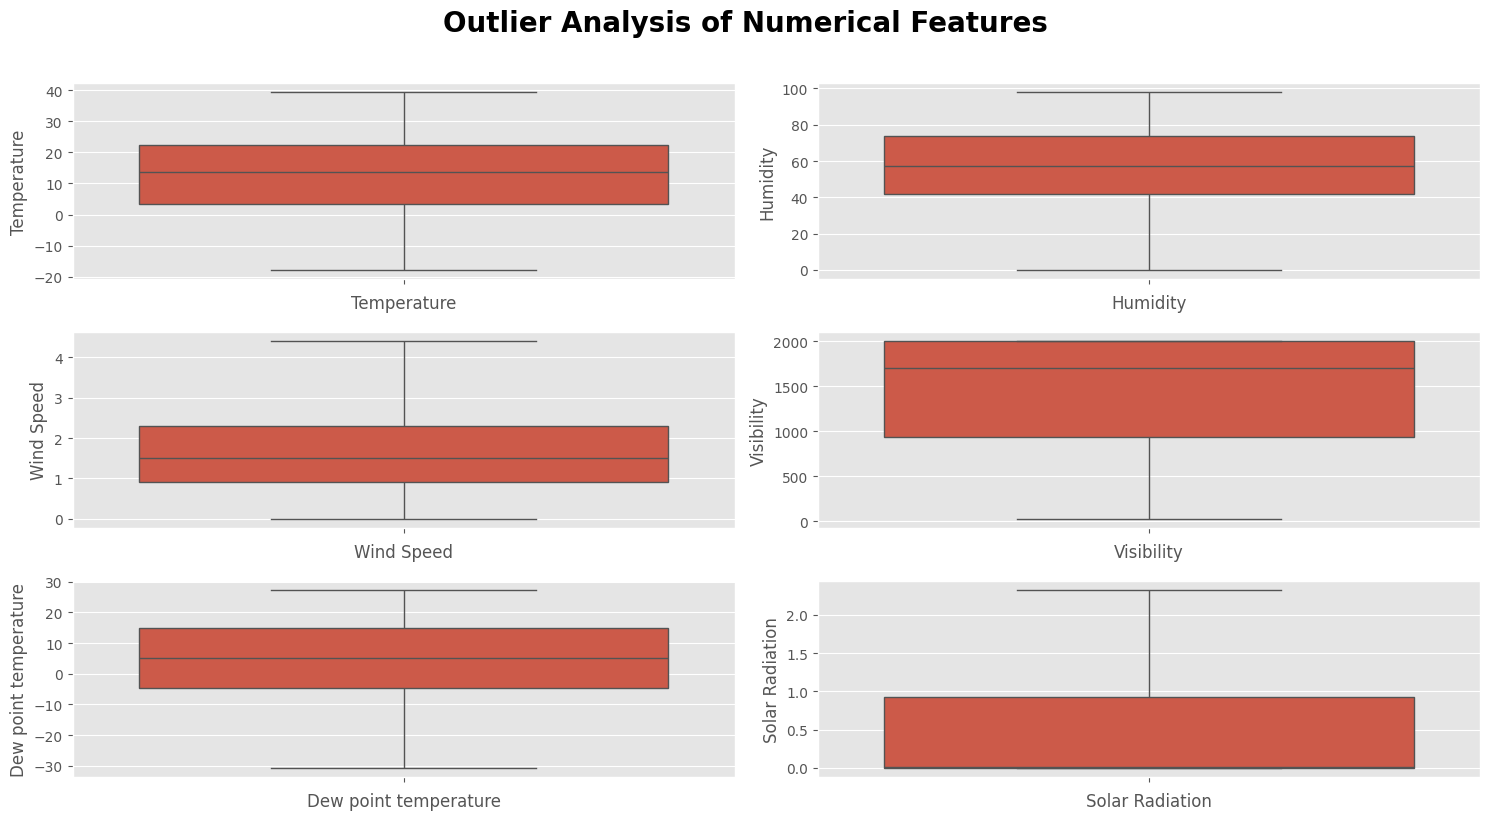

In [81]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,8))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_features):
  # subplot of 3 rows and 2 columns
  plt.subplot(3, 2, i+1)

  # countplot
  sns.boxplot(new_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

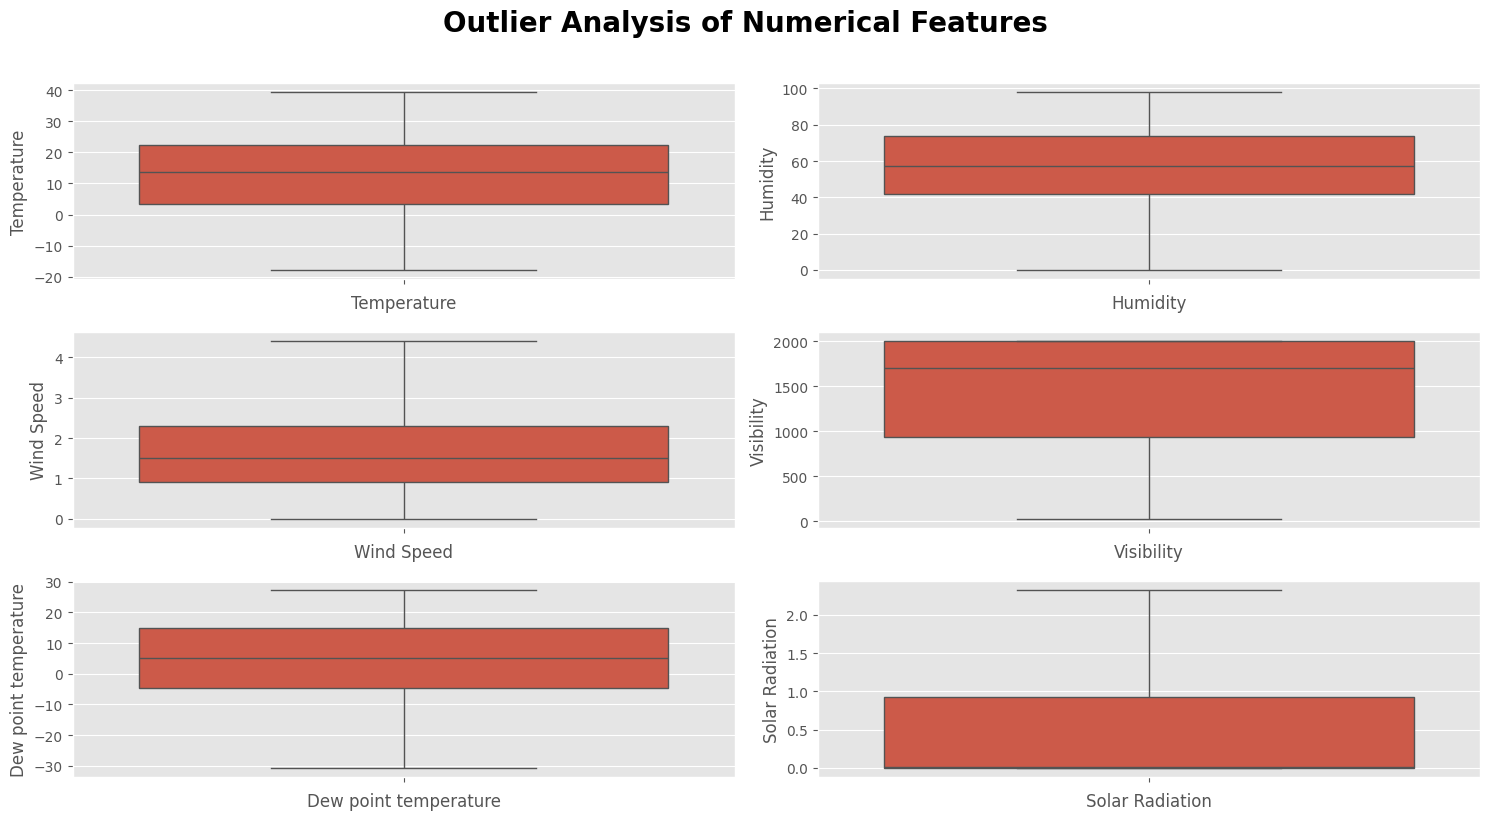

In [82]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,8))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_features):
  # subplot of 3 rows and 2 columns
  plt.subplot(3, 2, i+1)

  # countplot
  sns.boxplot(new_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, i am not utilizing the numerical feature transformation technique.

# Feature engineering

Feature engineering is the process of transforming raw data into a set of meaningful, informative, and predictive features that can be used to train machine learning models. It involves selecting, creating, or modifying features in the dataset to enhance the performance and effectiveness of the models.


Feature engineering is a critical step in machine learning because the quality and relevance of features can significantly impact the model's performance. Well-engineered features can help capture relevant patterns, relationships, and structures in the data, enabling the model to make accurate predictions or classifications

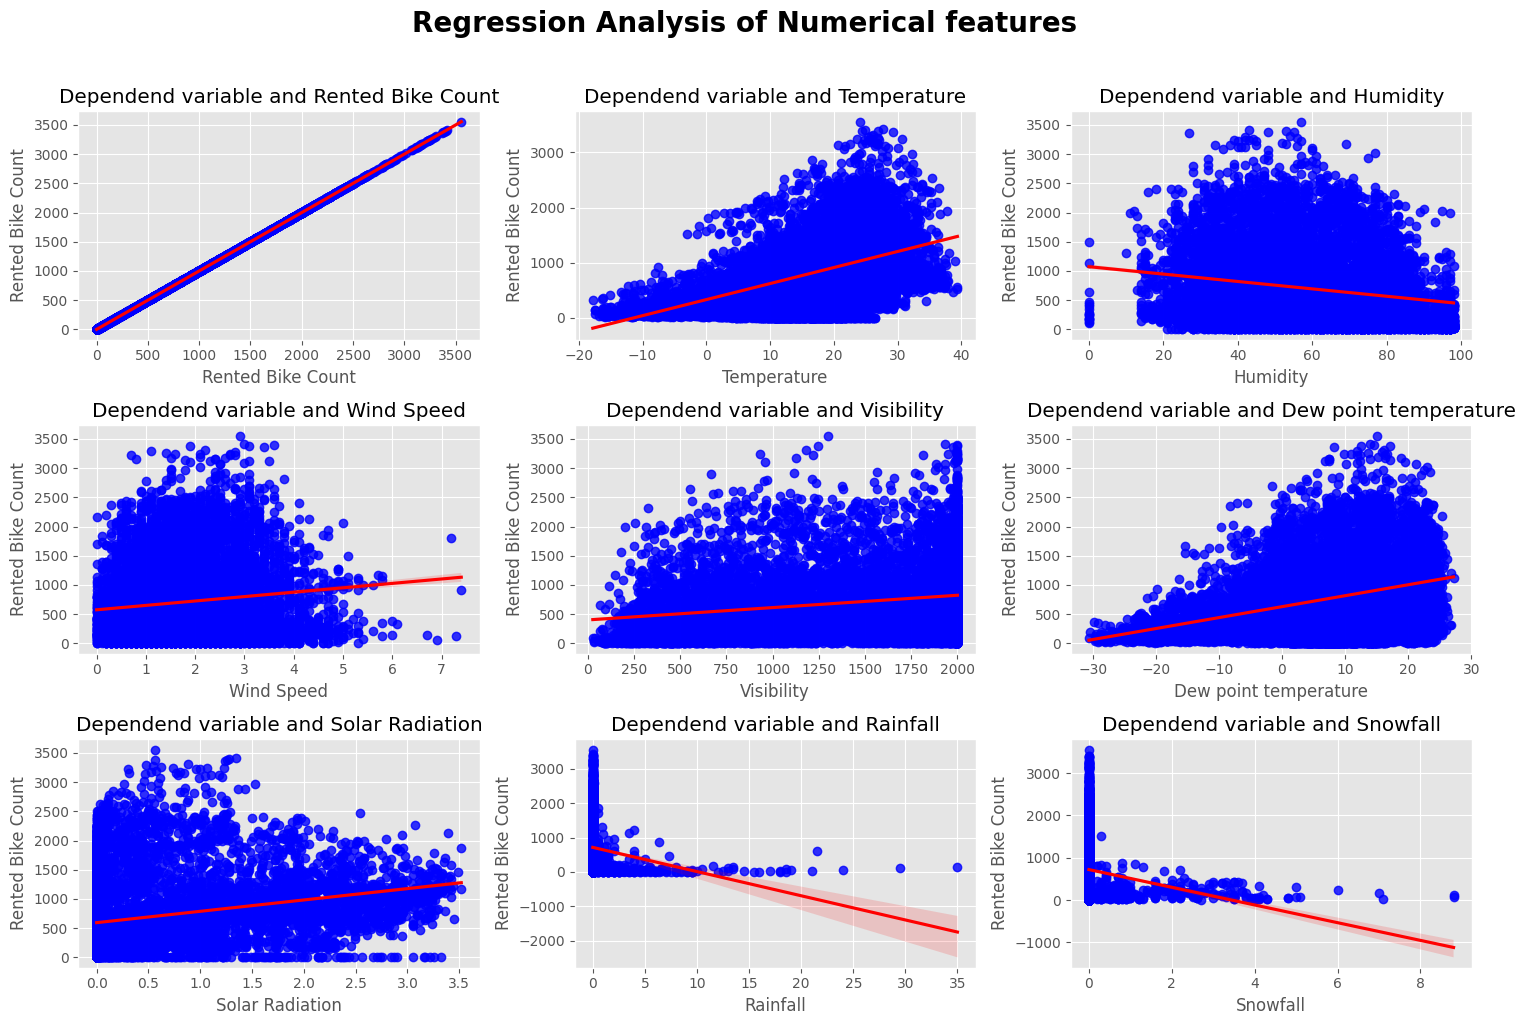

In [83]:

# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15, 10))

# title
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):

  # subplots of 3 rows and 3 columns
  plt.subplot(3, 3, i+1)

  # regression plots
  sns.regplot(x= numerical_features[col], y = numerical_features['Rented Bike Count'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

  plt.title(f'Dependend variable and {col}')
  plt.tight_layout()

Most of the numerical features are positively correlated to our target variable.

**Correlation Coefficient and Heatmap**

The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. It provides an indication of how closely the variables are related to each other.

The correlation coefficient, often denoted as "r," ranges from -1 to 1.
A correlation coefficient of 1 indicates a perfect positive linear relationship, where the variables increase or decrease together with a constant slope.

A correlation coefficient of -1 indicates a perfect negative linear relationship, where the variables move in opposite directions with a constant slope.

A correlation coefficient of 0 indicates no linear relationship between the variables.

The correlation coefficient is calculated using the covariance between the variables divided by the product of their standard deviations.

The correlation coefficient provides insight into the strength and direction of the relationship between variables.

However, it only measures linear relationships and does not capture other types of associations, such as nonlinear or complex dependencies.

In [86]:
# droping Dew point temperature column due to multi-collinearity

new_df.drop('Dew point temperature', axis=1, inplace=True)

#  VIF

VIF, which stands for Variance Inflation Factor, is a measure used in regression analysis to assess multicollinearity among predictor variables.
Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other, which can cause issues in interpreting the individual effects of the variables and can lead to unstable and unreliable model estimates.
The VIF quantifies the extent to which the variance of the estimated regression coefficient is inflated due to multicollinearity.
It measures how much the variance of a particular predictor variable's estimated coefficient is increased compared to if that variable were uncorrelated with the other predictor variables in the model.
Interpreting VIF values:

A VIF of 1 indicates no multicollinearity, meaning the predictor variable is not correlated with the other predictors.
A VIF greater than 1 suggests some degree of multicollinearity, where higher values indicate stronger correlation with other predictors.
A commonly used threshold is a VIF value of 5 or 10. Variables with VIF values exceeding these thresholds are considered to have high multicollinearity and may need to be addressed.
By examining VIF values, researchers can identify predictor variables that contribute to multicollinearity and take appropriate actions, such as removing highly correlated variables, combining variables, or gathering additional data to mitigate the multicollinearity issue.

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to calculate Multicollinearity

def calculate_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns

  return vif

In [88]:
# multicollinearity result

calculate_vif(new_df[[i for i in new_df.describe().columns if i not in ['Rented Bike Count','Date']]])


VIF Factor         features
0    3.155378      Temperature
1    4.774929         Humidity
2    4.252654       Wind Speed
3    4.446309       Visibility
4    2.319736  Solar Radiation
5    1.078541         Rainfall
6    1.118709         Snowfall

These are our final numerical variables to be considered for model building.

# Encoding

#  Encoding
Encoding refers to the process of converting categorical variables into numerical representations that can be understood and processed by machine learning algorithms. Since many machine learning algorithms require numerical inputs, encoding categorical variables becomes necessary.

In [89]:
# droping Year columns as it does not account for any information addition

new_df.drop(['Year'], axis=1, inplace = True)
categorical_features.drop('Year', axis = 1, inplace = True)

In [90]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("Number of unique values in", i, "is" , new_df[i].nunique())

Number of unique values in Hour is 24
Number of unique values in Seasons is 4
Number of unique values in Holiday is 2
Number of unique values in Functioning Day is 2
Number of unique values in Day is 7
Number of unique values in Month is 12


In [91]:
new_df.head()

Rented Bike Count Hour  Temperature  Humidity  Wind Speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   
3                107    3         -6.2        40         0.9        2000   
4                 78    4         -6.0        36         2.3        2000   

   Solar Radiation  Rainfall  Snowfall Seasons     Holiday Functioning Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   
2              0.0       0.0       0.0  Winter  No Holiday             Yes   
3              0.0       0.0       0.0  Winter  No Holiday             Yes   
4              0.0       0.0       0.0  Winter  No Holiday             Yes   

      Day     Month  
0  Friday  December  
1  Friday  December  
2  Friday  December  
3  Friday  December  
4  Friday  December

We will use one hot encoding for Seasons and Numeric encoding for Holiday and Functioning day.

In [92]:
ab = new_df.copy()
ab =pd.get_dummies(ab, columns=['Seasons'],prefix='Seasons',drop_first=True)

In [93]:
new_df = pd.get_dummies(new_df, columns = ['Seasons'], prefix='Seasons', drop_first = True)

In [94]:
# Numerical Encoding for holiday and functioning_day

new_df['Holiday'] = new_df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})

new_df['Functioning Day'] = new_df['Functioning Day'].map({'Yes': 1, 'No': 0})

In [95]:
new_df['Day'] = new_df['Day'].map({
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6,
})

new_df['Month'] = new_df['Month'].map({
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
})

In [96]:
new_df

Rented Bike Count Hour  Temperature  Humidity  Wind Speed  Visibility  \
0                   254    0         -5.2        37         2.2        2000   
1                   204    1         -5.5        38         0.8        2000   
2                   173    2         -6.0        39         1.0        2000   
3                   107    3         -6.2        40         0.9        2000   
4                    78    4         -6.0        36         2.3        2000   
...                 ...  ...          ...       ...         ...         ...   
8755               1003   19          4.2        34         2.6        1894   
8756                764   20          3.4        37         2.3        2000   
8757                694   21          2.6        39         0.3        1968   
8758                712   22          2.1        41         1.0        1859   
8759                584   23          1.9        43         1.3        1909   

      Solar Radiation  Rainfall  Snowfall  Holiday  Functioning Day  Day  \
0                 0.0       0.0       0.0        0                1    4   
1                 0.0       0.0       0.0        0                1    4   
2                 0.0       0.0       0.0        0                1    4   
3                 0.0       0.0       0.0        0                1    4   
4                 0.0       0.0       0.0        0                1    4   
...               ...       ...       ...      ...              ...  ...   
8755              0.0       0.0       0.0        0                1    4   
8756              0.0       0.0       0.0        0                1    4   
8757              0.0       0.0       0.0        0                1    4   
8758              0.0       0.0       0.0        0                1    4   
8759              0.0       0.0       0.0        0                1    4   

      Month  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0        12           False           False            True  
1        12           False           False            True  
2        12           False           False            True  
3        12           False           False            True  
4        12           False           False            True  
...     ...             ...             ...             ...  
8755     11           False           False           False  
8756     11           False           False           False  
8757     11           False           False           False  
8758     11           False           False           False  
8759     11           False           False           False  

[8760 rows x 16 columns]

Normalization of the target variable

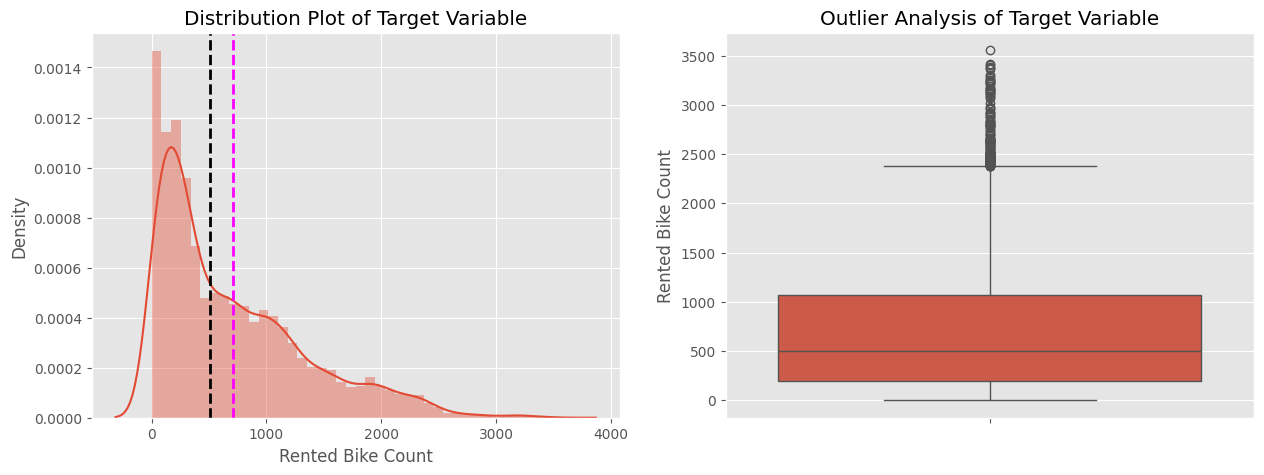

In [97]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(new_df['Rented Bike Count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# mean line
dist.axvline(new_df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(new_df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(new_df['Rented Bike Count'], ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

**Observation:**

The graph above indicates that the Rented Bike Count has a moderate right skewness. Linear regression assumes that the dependent variable has a normal distribution, therefore, to meet this assumption, we need to take some measures to normalize the distribution.

The boxplot above indicates that there are outliers in the rented bike count column.

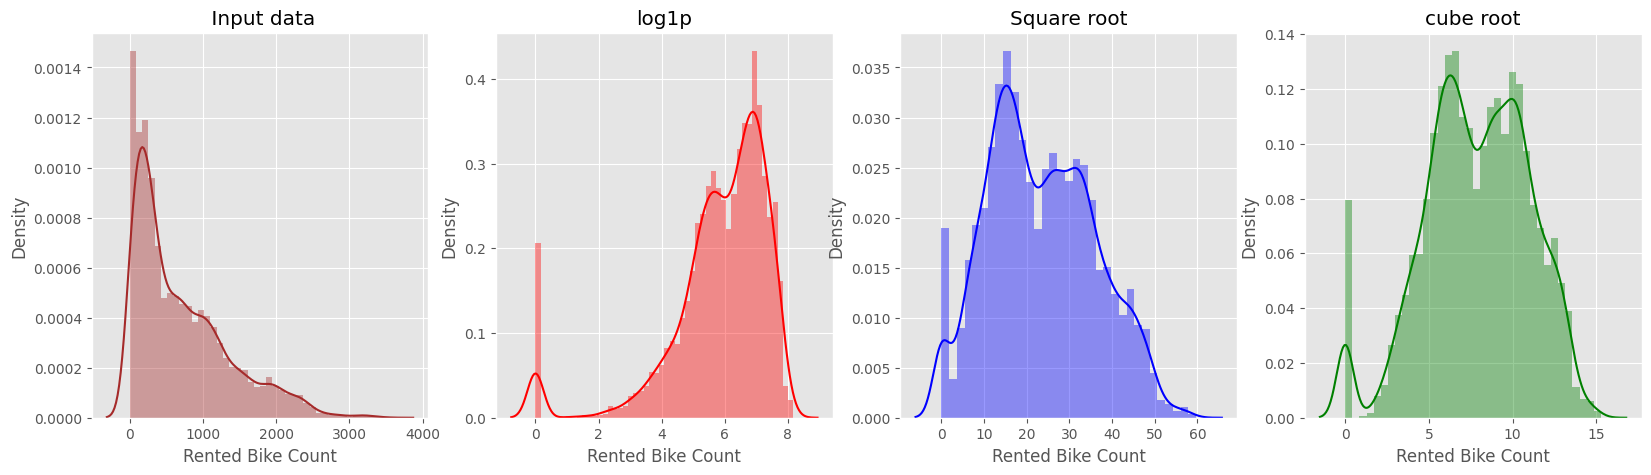

In [98]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((new_df['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data");

# here we use log10
#transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.log1p(new_df['Rented Bike Count']),ax=axes[1],color='red').set_title("log1p");

# here we use square root
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root");

# here we use cube root
sns.distplot(np.cbrt(new_df['Rented Bike Count']),ax=axes[3], color='green').set_title("cube root");


**Observations:**

Applying a logarithmic transformation to the dependent variable did not help much as it resulted in a negatively skewed distribution.

Square root and cube root transformations were attempted, but they did not result in a normally distributed variable.

Therefore, we will use a square root transformation for the regression as it transformed the variable into a well-distributed form.

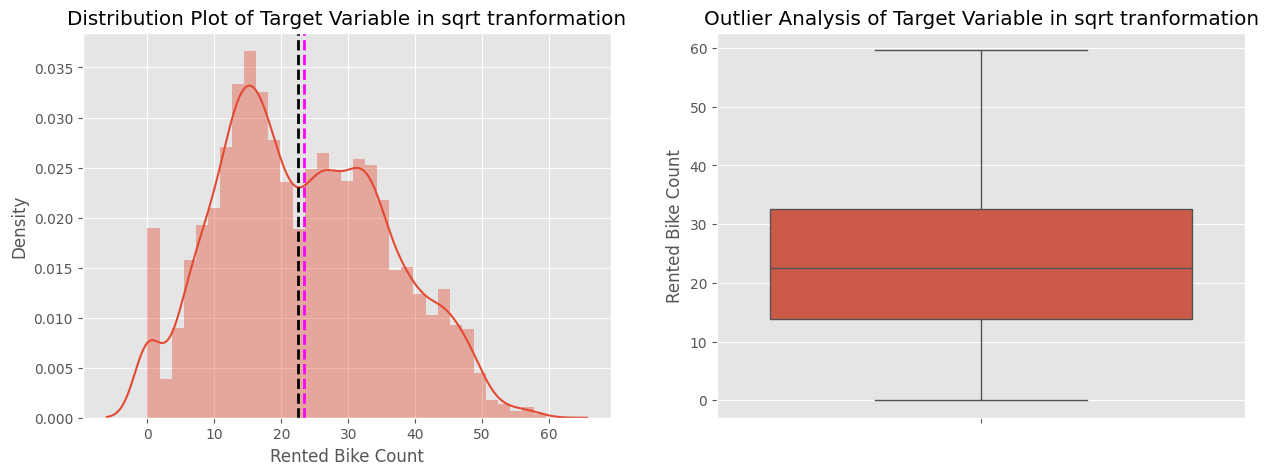

In [99]:

fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(new_df['Rented Bike Count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# mean line
dist.axvline(np.sqrt(new_df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# median line
dist.axvline(np.sqrt(new_df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(np.sqrt(new_df['Rented Bike Count']), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

**Observation:**

By applying the square root transformation to the skewed Rented Bike Count, we were able to obtain an almost normal distribution, which is in line with the general rule that skewed variables should be normalized in linear regression.
We found that there are no outliers in the Rented Bike Count column after applying square root transformation.

In [100]:

# applying square root on Rented_Bike_Count
new_df['Rented Bike Count']=np.sqrt(new_df['Rented Bike Count'])

In [101]:
new_df['Hour']=new_df['Hour'].astype('int64')

# Manipulations done and insights found
I checked for correlation coefficient and found that most of the numerical features are positively correlated to our target variable.
From heatmap and correlation coefficient, dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence we dropped dew_point_temperature.
I also did a VIF analysis to remove multi-colinearity and since the VIF factor of 'year' is too large hence i removed the year from our data to build our model.

I encoded the categorical features which are necessary for the model to understand. We used one hot encoding for 'seasons' and Numeric encoding for 'holiday' and 'functioning_day' and 'Day', 'Month' column.
To treat the target variable i Applied a logarithmic transformation to the target variable did not help much as it resulted in a negatively skewed distribution, Square root, and cube root transformations were attempted, but they did not result in a normally distributed variable. Therefore, we used a square root transformation for the regression as it transformed the variable into a well-distributed form.

# Model Building

Train_test_split

In [102]:
# diving the input feature and target variable
X = new_df.drop('Rented Bike Count', axis=1)   # input_features
y= new_df['Rented Bike Count']                 # target_column


In [103]:
# dividing the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(7008, 15)
(1752, 15)


**Evaluation Metrics Used -**

**The mean squared error (MSE):-** It tells you how close a regression line is to a set of points.

**Root Mean Square Error (RMSE):-** It is the standard deviation of the residuals (prediction errors).

**Mean Absolute Error (MAE):-** These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

**R-squared (R2):-** It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

**Adjusted R-squared:-** It is a modified version of R-squared that has been adjusted for the number of predictors in the model.

​

# Model Training

In [105]:
# empty list for appending performance metric score
model_result = []

def predict(ml_model,model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train,y_train)

  # predicting values
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
  y_train_pred_original = np.power(y_train_pred, 2)
  y_test_pred_original = np.power(y_test_pred, 2)

  # graph --> best fit line on test data
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  # graph --> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})

Model Implementation

train MSE : 53.762
train RMSE : 7.332
train MAE : 5.631
train R2 : 0.655
train Adj R2 : 0.655
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.963
test RMSE : 7.278
test MAE : 5.62
test R2 : 0.649
test Adj R2 : 0.646
------------------------------------------------------------------------------------------------------------------------------------------------------


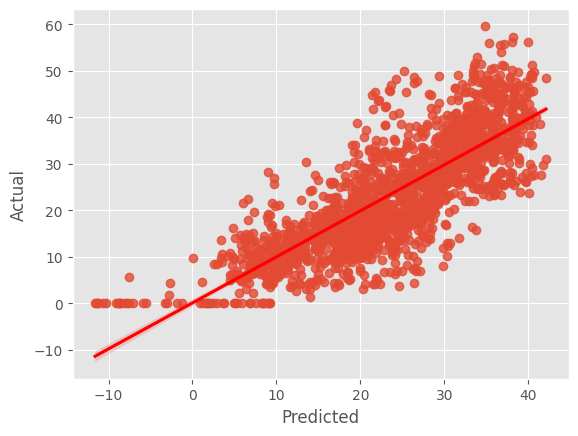

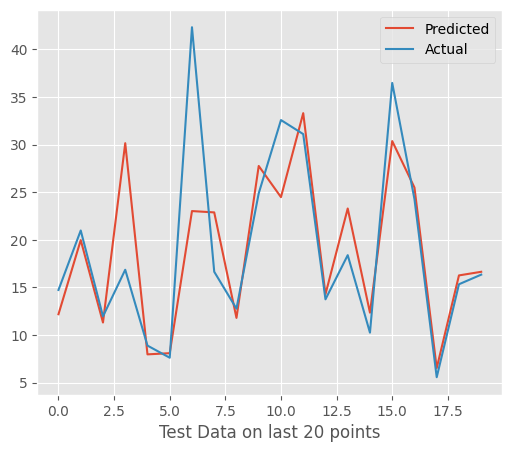

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  12.182725  19.965642  11.310303  30.141963  7.967929
error       2.548195   1.010535   0.647958 -13.289663  0.920265
------------------------------------------------------------------------------------------------------------------------------------------------------


In [107]:
#Linear regression
predict(LinearRegression(), 'LinearRegression')


# Lasso

train MSE : 54.84
train RMSE : 7.405
train MAE : 5.709
train R2 : 0.649
train Adj R2 : 0.648
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 54.176
test RMSE : 7.36
test MAE : 5.694
test R2 : 0.641
test Adj R2 : 0.638
------------------------------------------------------------------------------------------------------------------------------------------------------


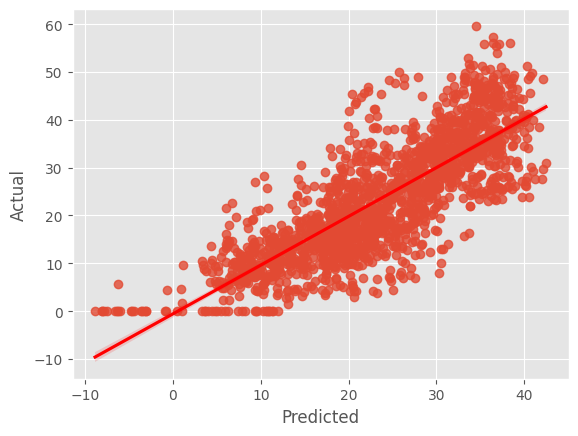

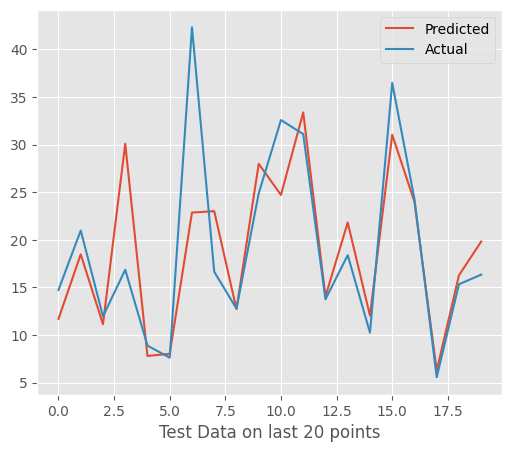

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.691299  18.471655  11.132284  30.080799  7.800818
error       3.039621   2.504522   0.825977 -13.228499  1.087377
------------------------------------------------------------------------------------------------------------------------------------------------------


In [108]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso')

# Ridge

train MSE : 53.762
train RMSE : 7.332
train MAE : 5.631
train R2 : 0.655
train Adj R2 : 0.655
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.963
test RMSE : 7.278
test MAE : 5.62
test R2 : 0.649
test Adj R2 : 0.646
------------------------------------------------------------------------------------------------------------------------------------------------------


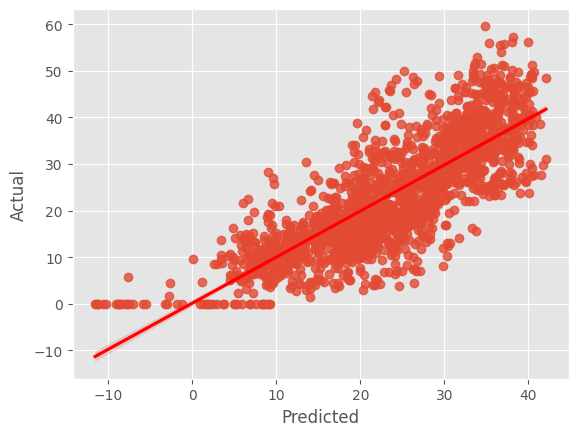

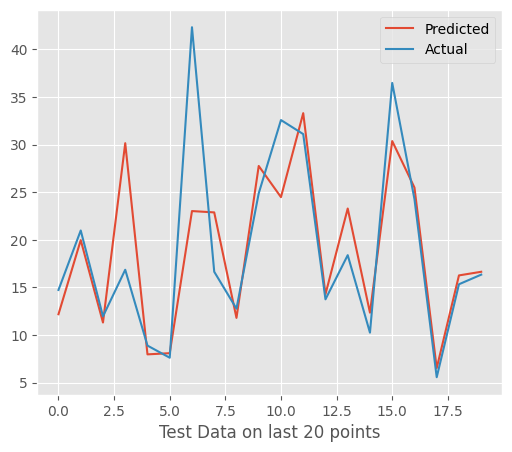

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  12.182409  19.963286  11.310287  30.142014  7.967975
error       2.548511   1.012891   0.647974 -13.289714  0.920219
------------------------------------------------------------------------------------------------------------------------------------------------------


In [109]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge')

# K - Nearest neighbour

train MSE : 41.474
train RMSE : 6.44
train MAE : 4.423
train R2 : 0.734
train Adj R2 : 0.734
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 70.693
test RMSE : 8.408
test MAE : 6.042
test R2 : 0.531
test Adj R2 : 0.527
------------------------------------------------------------------------------------------------------------------------------------------------------


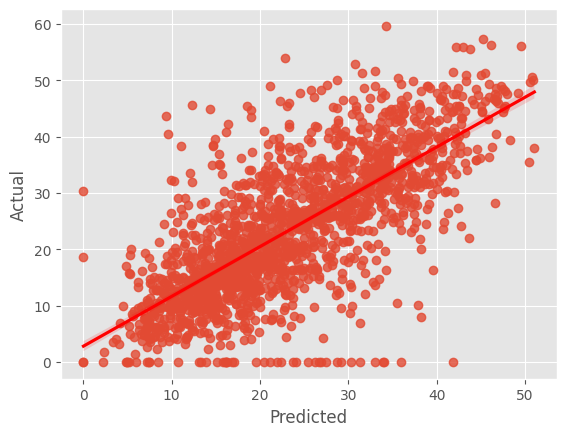

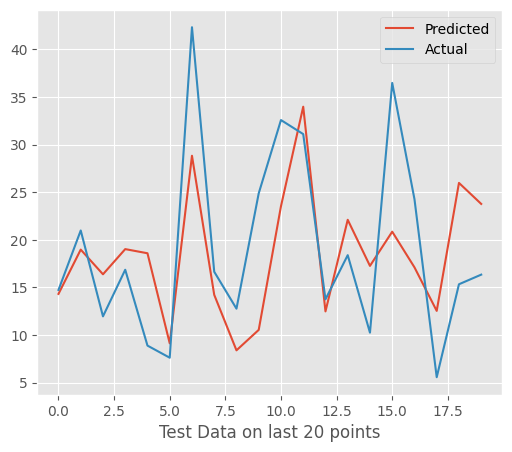

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict  14.316748  18.967604  16.376317  19.020255  18.584894
error       0.414172   2.008573  -4.418057  -2.167955  -9.696699
------------------------------------------------------------------------------------------------------------------------------------------------------


In [110]:
predict(KNeighborsRegressor(n_neighbors=3),'KNN')

# Support vector Machine

train MSE : 84.284
train RMSE : 9.181
train MAE : 6.734
train R2 : 0.46
train Adj R2 : 0.459
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 76.181
test RMSE : 8.728
test MAE : 6.519
test R2 : 0.495
test Adj R2 : 0.491
------------------------------------------------------------------------------------------------------------------------------------------------------


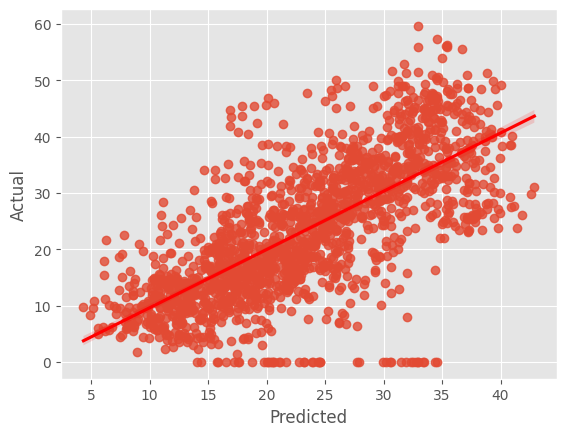

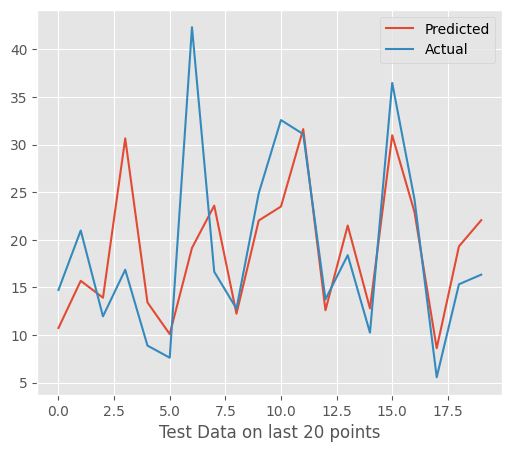

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict  10.737915  15.690307  13.915975  30.646324  13.421479
error       3.993005   5.285870  -1.957714 -13.794025  -4.533285
------------------------------------------------------------------------------------------------------------------------------------------------------


In [111]:
predict(SVR(kernel='rbf',C=100), 'SVM')

# **Decision tree**

train MSE : 13.048
train RMSE : 3.612
train MAE : 2.445
train R2 : 0.916
train Adj R2 : 0.916
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 18.358
test RMSE : 4.285
test MAE : 2.894
test R2 : 0.878
test Adj R2 : 0.877
------------------------------------------------------------------------------------------------------------------------------------------------------


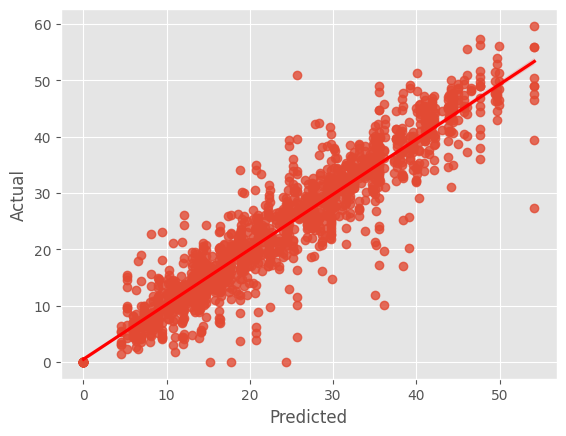

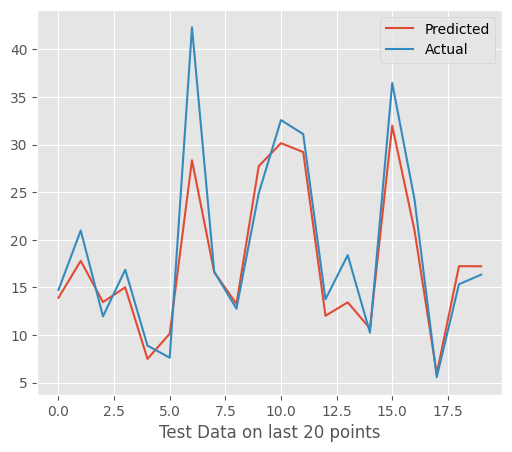

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  13.907997  17.787709  13.452619  15.008659  7.490911
error       0.822923   3.188468  -1.494358   1.843640  1.397284
------------------------------------------------------------------------------------------------------------------------------------------------------


In [112]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree')


# **Random Forest**

Hyperparameter tuning using grid searchcv

In [113]:
param_grid = {'n_estimators': [50,80],       # number of trees in the ensemble
             'max_depth': [15,20],           # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],    # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [114]:
# Get the best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)

train MSE : 3.529
train RMSE : 1.879
train MAE : 1.167
train R2 : 0.977
train Adj R2 : 0.977
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 9.689
test RMSE : 3.113
test MAE : 1.979
test R2 : 0.936
test Adj R2 : 0.935
------------------------------------------------------------------------------------------------------------------------------------------------------


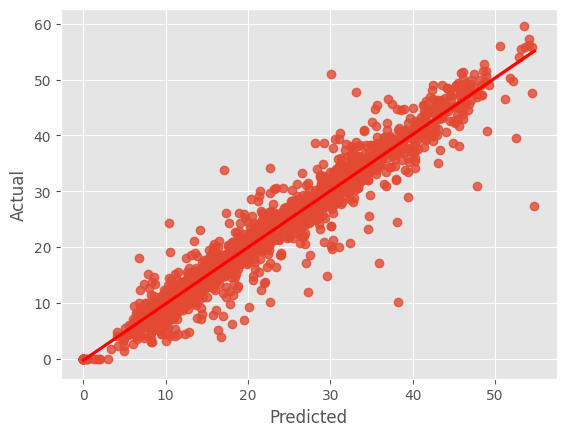

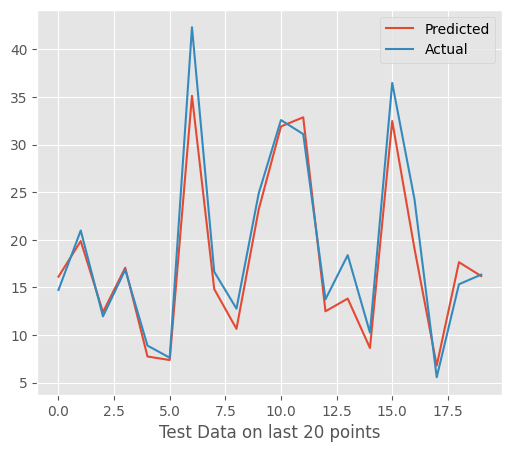

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  16.121917  19.862454  12.401786  17.067617  7.744007
error      -1.390997   1.113723  -0.443525  -0.215318  1.144188
------------------------------------------------------------------------------------------------------------------------------------------------------


In [115]:
predict(rf_optimal_model, 'Random Forest')

In [116]:
# feature importance
importances = rf_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       Temperature            0.272043
0              Hour            0.257146
9   Functioning Day            0.170048
2          Humidity            0.078017
6          Rainfall            0.074460
14   Seasons_Winter            0.053570
5   Solar Radiation            0.028311
10              Day            0.026943
11            Month            0.019962
4        Visibility            0.007521
3        Wind Speed            0.006095
8           Holiday            0.002801
7          Snowfall            0.001306
13   Seasons_Summer            0.001092
12   Seasons_Spring            0.000685

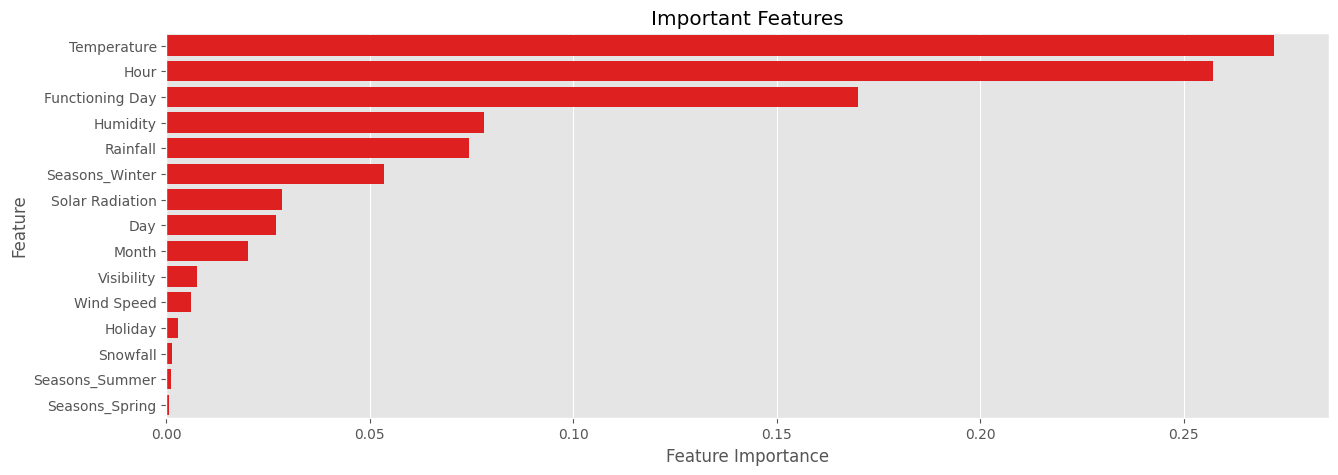

In [117]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='red')
bar.set_title('Important Features')
plt.show()

The top 5 important features in Random Forest are temperature, hour, functioning_day, rainfall, and humidity

# XGBOOST

Finding best hyperparameter using gridsearchcv

In [118]:
param_grid = {'n_estimators': [300,500],     # number of trees in the ensemble
             'max_depth': [7,8],             # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
xgb = XGBRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             scoring='r2')

In [119]:
# Get the best parameters from the grid search
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, min_samples_leaf=3, min_samples_split=3,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=500, n_jobs=None, ...)

train MSE : 0.0
train RMSE : 0.0
train MAE : 0.006
train R2 : 1.0
train Adj R2 : 1.0
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 7.916
test RMSE : 2.814
test MAE : 1.704
test R2 : 0.948
test Adj R2 : 0.947
------------------------------------------------------------------------------------------------------------------------------------------------------


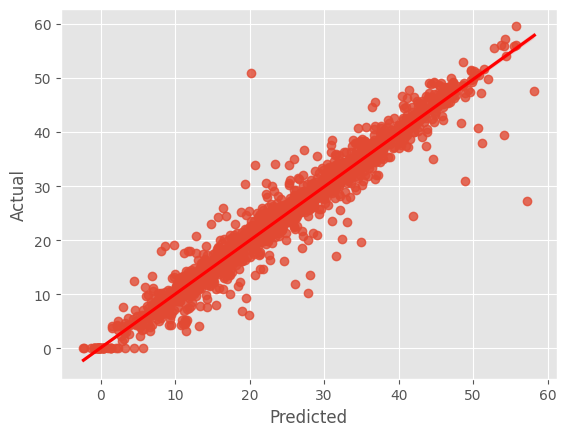

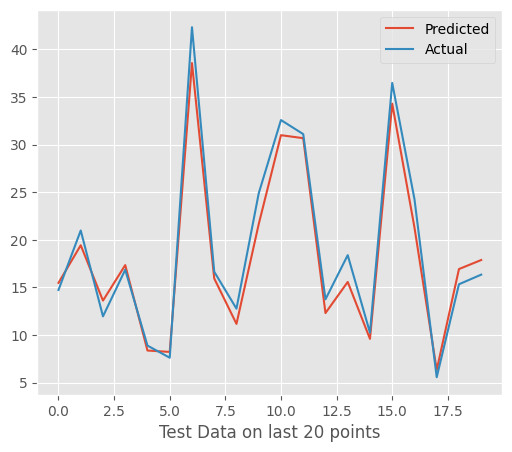

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.474163  19.426239  13.611640  17.341007  8.369952
error      -0.743243   1.549938  -1.653379  -0.488708  0.518242
------------------------------------------------------------------------------------------------------------------------------------------------------


In [120]:
predict(xgb_optimal_model, 'XGB')

In [121]:
# feature importance
importances = xgb_optimal_model.feature_importances_

# Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
9   Functioning Day            0.600175
14   Seasons_Winter            0.258963
6          Rainfall            0.082607
0              Hour            0.013028
1       Temperature            0.011650
8           Holiday            0.011046
11            Month            0.005851
10              Day            0.004742
2          Humidity            0.003912
5   Solar Radiation            0.002494
13   Seasons_Summer            0.002141
7          Snowfall            0.002065
4        Visibility            0.000580
3        Wind Speed            0.000434
12   Seasons_Spring            0.000312

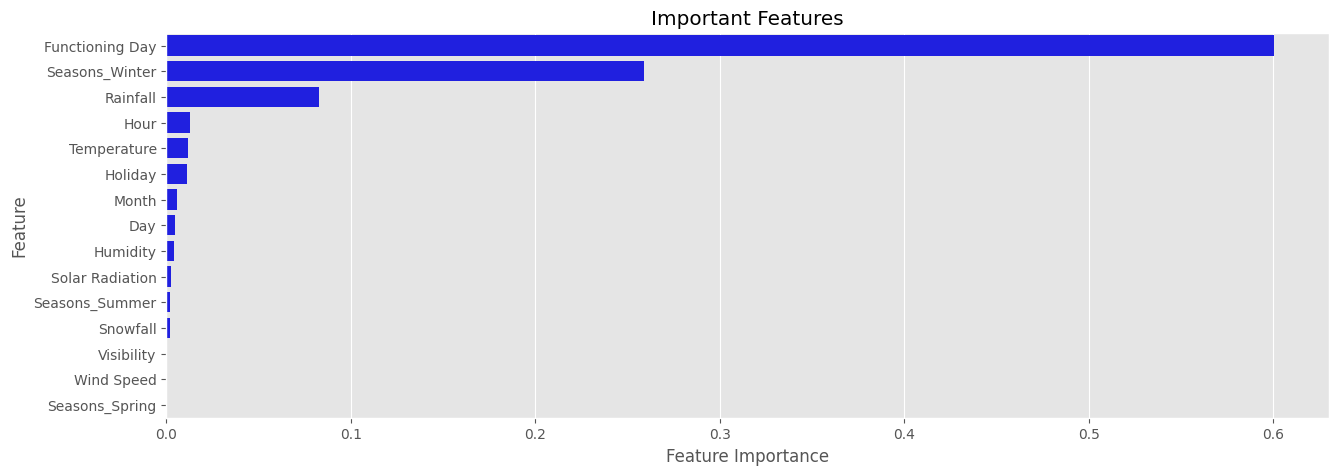

In [122]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()


Top 5 feature for xgboost is functioning day,season_winter,rainfall,hour,tempareture.

# **Model result**

In [123]:
# converting the model_result list into DataFrame
model_result = pd.DataFrame(model_result)

# sorting the values by test R2 score
model_result.sort_values(by='test R2', ascending=False)

model  train MSE  test MSE  train RMSE  test RMSE  train MAE  \
7               XGB      0.000     7.916       0.000      2.814      0.006   
6     Random Forest      3.529     9.689       1.879      3.113      1.167   
5     Decision Tree     13.048    18.358       3.612      4.285      2.445   
0  LinearRegression     53.762    52.963       7.332      7.278      5.631   
2             Ridge     53.762    52.963       7.332      7.278      5.631   
1             Lasso     54.840    54.176       7.405      7.360      5.709   
3               KNN     41.474    70.693       6.440      8.408      4.423   
4               SVM     84.284    76.181       9.181      8.728      6.734   

   test MAE  train R2  test R2  train Adj R2  test Adj R2  
7     1.704     1.000    0.948         1.000        0.947  
6     1.979     0.977    0.936         0.977        0.935  
5     2.894     0.916    0.878         0.916        0.877  
0     5.620     0.655    0.649         0.655        0.646  
2     5.620     0.655    0.649         0.655        0.646  
1     5.694     0.649    0.641         0.648        0.638  
3     6.042     0.734    0.531         0.734        0.527  
4     6.519     0.460    0.495         0.459        0.491

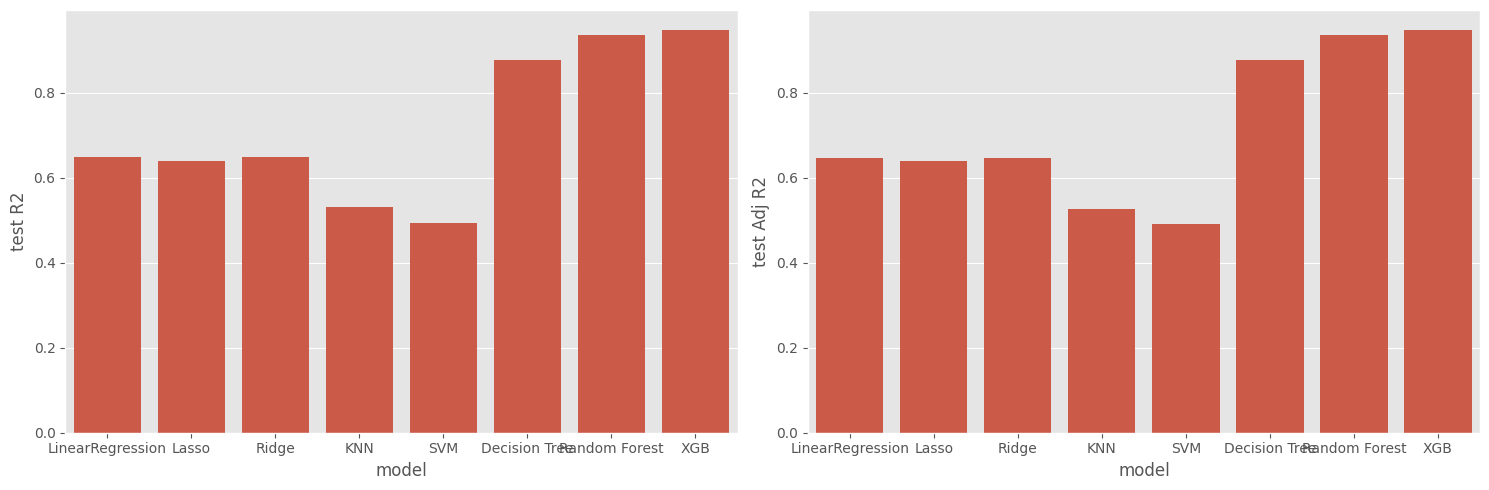

In [124]:

# plotting graph to compare model performance of all the models
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])           # Model Vs test R2
sns.barplot(x=model_result['model'], y=model_result['test Adj R2'], ax=ax[1])       # Model Vs test Adj R2
plt.tight_layout()

**From the above result we can select xgboost or random forest as its give less error compare to other model.**

# Conclusion

**Summary**

I began my analysis by performing EDA on all of our datasets. First, i looked at and changed our dependent variable, "Rental Bike Count." After that, i looked at categorical variables and numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, i encoded the categorical variables and removed some numerical features which are used only for EDA purposes and have multi-collinearity.

Following that, i examine several well-known individual models, ranging from straightforward Linear Regression and Regularization Models (Ridge, Lasso) to more complex and ensemble models like Random Forest, XGBOOST. To enhance the performance of my model, i performed hyperparameter tuning.



1.   The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.

1.  While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.

1.  Maintenance activities for bikes should be done at night due to the low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers

2.   I see 2 rental patterns across the day in bike rental count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.

1.   **Hour of the day:** Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.

1.   **Temperature:** People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius

2.   **Season:** We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.

2.  **Weather:** As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day

2.   **Humidity:** With increasing humidity, we see a decrease in the bike rental count


10.   I choose XGBOOST as it give less error.



# Way Forward

# Way Forward

However, this is not the ultimate end. As this data is time-dependent, the values for variables like temperature, wind speed, solar radiation, etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having quality knowledge and keeping pace with the ever-evolving ML field would surely help one to stay a step ahead in the future.